# Analyse exploratoire
## 1. Importation des données
### 1.1. Chargement des librairies

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

# Outils de sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, StandardScaler

from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

# Import KMeans pour clustering
from sklearn.cluster import KMeans

# Visualisation de dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Aide à la visualisation pour les modèles de clustering
from yellowbrick.cluster import KElbowVisualizer

sns.set_style("whitegrid")  # style choisi pour les graphes

# Utilisation du module nb_black pour formater le code
%load_ext nb_black

<IPython.core.display.Javascript object>

### 1.2. Chargement des données

In [2]:
data = pd.read_csv("student_data.csv", index_col=0)

<IPython.core.display.Javascript object>

### 1.3. Aperçu du dataset

In [3]:
data

FirstName FamilyName school sex  age address famsize Pstatus  Medu  \
StudentID                                                                      
0            Rafael     Morais     GP   F   18       U     GT3       A     4   
1              Lara      Braga     GP   F   17       U     GT3       T     1   
2           Gonçalo    Azevedo     GP   F   15       U     LE3       T     1   
3              Lara      Perna     GP   F   15       U     GT3       T     4   
4              João      Pires     GP   F   16       U     GT3       T     3   
...             ...        ...    ...  ..  ...     ...     ...     ...   ...   
390           Alice  Barcellos     MS   M   20       U     LE3       A     2   
391         Rodrigo    Quintal     MS   M   17       U     LE3       T     3   
392        Carolina       Hiza     MS   M   21       R     GT3       T     1   
393        Benedita     Amaral     MS   M   18       R     LE3       T     3   
394        Lourenço       Luis     MS   M   19       U     LE3       T     1   

           Fedu  ... internet romantic famrel freetime  goout  Dalc  Walc  \
StudentID        ...                                                        
0             4  ...       no       no      4        3      4     1     1   
1             1  ...      yes       no      5        3      3     1     1   
2             1  ...      yes       no      4        3      2     2     3   
3             2  ...      yes      yes      3        2      2     1     1   
4             3  ...       no       no      4        3      2     1     2   
...         ...  ...      ...      ...    ...      ...    ...   ...   ...   
390           2  ...       no       no      5        5      4     4     5   
391           1  ...      yes       no      2        4      5     3     4   
392           1  ...       no       no      5        5      3     3     3   
393           2  ...      yes       no      4        4      1     3     4   
394           1  ...      yes       no      3        2      3     3     3   

          health absences FinalGrade  
StudentID                             
0              3        6          6  
1              3        4          6  
2              3       10         10  
3              5        2         15  
4              5        4         10  
...          ...      ...        ...  
390            4       11          9  
391            2        3         16  
392            3        3          7  
393            5        0         10  
394            5        5          9  

[357 rows x 33 columns]

<IPython.core.display.Javascript object>

Quelques données surprenantes sur le sexe : 
- Raphael (0), Gonçalo (2) taggés de sexe féminin, alors qu'il s'agit de prénoms masculins
- Carolina (392) et Benedita (393) taggés de sexe masculin, alors qu'il s'agit de prénoms féminins

In [4]:
data.loc[data["FirstName"] == "Rafael"]

FirstName   FamilyName school sex  age address famsize Pstatus  \
StudentID                                                                  
0            Rafael       Morais     GP   F   18       U     GT3       A   
5            Rafael         Alva     GP   M   16       U     LE3       T   
10           Rafael      Sanches     GP   F   15       U     GT3       T   
23           Rafael    Rodriques     GP   M   16       U     LE3       T   
33           Rafael     Guardado     GP   M   15       U     LE3       T   
43           Rafael     Martines     GP   M   15       U     GT3       T   
58           Rafael      Gandara     GP   M   15       U     LE3       T   
59           Rafael      Maestre     GP   F   16       U     GT3       T   
123          Rafael         Sago     GP   M   16       U     GT3       T   
158          Rafael        Peres     GP   M   16       R     GT3       T   
177          Rafael        Paiva     GP   M   17       U     GT3       T   
211          Rafael        Naves     GP   M   17       U     LE3       T   
249          Rafael       Osorio     GP   M   16       U     GT3       T   
253          Rafael    Rodrigues     GP   M   16       R     GT3       T   
275          Rafael  De Oliveira     GP   F   17       U     LE3       T   
290          Rafael        Mello     GP   M   18       U     GT3       T   
302          Rafael         Rego     GP   F   17       U     GT3       T   
335          Rafael    Espindola     GP   F   17       U     GT3       T   
363          Rafael      Pestana     MS   F   17       U     LE3       T   
381          Rafael     Mendonca     MS   M   18       R     GT3       T   

           Medu  Fedu  ... internet romantic famrel freetime  goout  Dalc  \
StudentID              ...                                                  
0             4     4  ...       no       no      4        3      4     1   
5             4     3  ...      yes       no      5        4      2     1   
10            4     4  ...      yes       no      3        3      3     1   
23            2     2  ...      yes       no      5        4      4     2   
33            3     3  ...      yes       no      5        3      2     1   
43            2     2  ...      yes       no      5        4      1     1   
58            1     2  ...      yes       no      4        3      2     1   
59            4     2  ...      yes       no      4        2      3     1   
123           4     4  ...      yes       no      3        4      4     1   
158           2     2  ...       no       no      4        2      2     1   
177           3     3  ...      yes       no      4        3      4     1   
211           4     4  ...      yes      yes      5        3      5     4   
249           0     2  ...      yes       no      4        3      2     2   
253           2     1  ...       no       no      3        3      2     1   
275           2     2  ...      yes      yes      4        4      4     2   
290           4     2  ...      yes      yes      4        3      2     1   
302           4     2  ...      yes       no      4        3      3     1   
335           3     4  ...      yes       no      4        4      5     1   
363           4     4  ...      yes      yes      2        3      4     1   
381           2     1  ...      yes      yes      4        4      3     1   

           Walc health absences FinalGrade  
StudentID                                   
0             1      3        6          6  
5             2      5       10         15  
10            2      2        0          9  
23            4      5        0         12  
33            1      2        0         12  
43            1      1        0         11  
58            1      5        2          9  
59            1      5        2         16  
123           4      5       18         13  
158           2      3        2         15  
177           4      4        4          6  
211           5      3       13         13  
249         

<IPython.core.display.Javascript object>

In [5]:
data.loc[data["FirstName"] == "Carolina"]

FirstName FamilyName school sex  age address famsize Pstatus  Medu  \
StudentID                                                                      
61         Carolina    Quadros     GP   F   16       U     GT3       T     1   
240        Carolina      Pinho     GP   M   17       U     LE3       T     4   
330        Carolina      Ennes     GP   M   18       U     LE3       T     2   
392        Carolina       Hiza     MS   M   21       R     GT3       T     1   

           Fedu  ... internet romantic famrel freetime  goout  Dalc  Walc  \
StudentID        ...                                                        
61            1  ...      yes      yes      5        5      5     5     5   
240           3  ...      yes      yes      2        5      5     1     4   
330           2  ...      yes       no      4        5      5     2     4   
392           1  ...       no       no      5        5      3     3     3   

          health absences FinalGrade  
StudentID                             
61             5        6         11  
240            5       14         12  
330            5        2          8  
392            3        3          7  

[4 rows x 33 columns]

<IPython.core.display.Javascript object>

## 2. Description des données

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   FirstName   357 non-null    object
 1   FamilyName  357 non-null    object
 2   school      357 non-null    object
 3   sex         357 non-null    object
 4   age         357 non-null    int64 
 5   address     357 non-null    object
 6   famsize     357 non-null    object
 7   Pstatus     357 non-null    object
 8   Medu        357 non-null    int64 
 9   Fedu        357 non-null    int64 
 10  Mjob        357 non-null    object
 11  Fjob        357 non-null    object
 12  reason      357 non-null    object
 13  guardian    357 non-null    object
 14  traveltime  357 non-null    int64 
 15  studytime   357 non-null    int64 
 16  failures    357 non-null    int64 
 17  schoolsup   357 non-null    object
 18  famsup      357 non-null    object
 19  paid        357 non-null    object
 20  activities

<IPython.core.display.Javascript object>

Le dataset ne comporte pas de valeurs manquantes.

In [7]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  357.000000  357.000000  357.000000  357.000000  357.000000  357.000000   
mean    16.655462    2.795518    2.546218    1.431373    2.042017    0.271709   
std      1.268262    1.093999    1.084217    0.686075    0.831895    0.671750   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  357.000000  357.000000  357.000000  357.000000  357.000000  357.000000   
mean     3.955182    3.246499    3.098039    1.495798    2.330532    3.549020   
std      0.885721    1.011601    1.090779    0.919886    1.294974    1.402638   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences  FinalGrade  
count  357.000000  357.000000  
mean     6.316527   11.523810  
std      8.187623    3.227797  
min      0.000000    4.000000  
25%      2.000000    9.000000  
50%      4.000000   11.000000  
75%      8.000000   14.000000  
max     75.000000   20.000000

<IPython.core.display.Javascript object>

Les valeurs numériques semblent cohérentes.

#### Valeurs uniques

In [8]:
print("Nombre de valeurs uniques chez : ")
for column in data.columns:
    print("- {} : {}".format(column, data[column].nunique()))
print("\n")

Nombre de valeurs uniques chez : 
- FirstName : 40
- FamilyName : 355
- school : 2
- sex : 2
- age : 8
- address : 2
- famsize : 2
- Pstatus : 2
- Medu : 5
- Fedu : 5
- Mjob : 5
- Fjob : 5
- reason : 4
- guardian : 3
- traveltime : 4
- studytime : 4
- failures : 4
- schoolsup : 2
- famsup : 2
- paid : 2
- activities : 2
- nursery : 2
- higher : 2
- internet : 2
- romantic : 2
- famrel : 5
- freetime : 5
- goout : 5
- Dalc : 5
- Walc : 5
- health : 5
- absences : 34
- FinalGrade : 17




<IPython.core.display.Javascript object>

#### Doublons

In [9]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

Pas de doublons dans les données.

## 3. Analyse exploratoire 
#### Nombre d'élèves

In [10]:
data.shape

(357, 33)

<IPython.core.display.Javascript object>

#### Datasets par école

In [11]:
data_GP = data.loc[data["school"] == "GP"]
data_GP.shape

(315, 33)

<IPython.core.display.Javascript object>

In [12]:
data_MS = data.loc[data["school"] == "MS"]
data_MS.shape

(42, 33)

<IPython.core.display.Javascript object>

#### Visualisation des données

In [13]:
def dis_plot(df, col):

    """Fonction pour visualiser sous forme de histplot
    et boxplot la distribution d'une colonne d'un dataframe

    - Arguments :
        - df : dataframe
        - col : colonne du dataframe dont on veut visualiser
        la distribution

    - Affiche :
        - 1 graphe de type histplot
        - 1 box plot

    """
    f, axes = plt.subplots(2, 1, figsize=(15, 6))
    plt.suptitle("Distribution de {}".format(col), size=11)

    # histogramme
    sns.histplot(x=col, data=df, ax=axes[0])
    # boxplot
    sns.boxplot(x=col, data=df, ax=axes[1])
    plt.xlabel(col, size=11)
    plt.show()

<IPython.core.display.Javascript object>

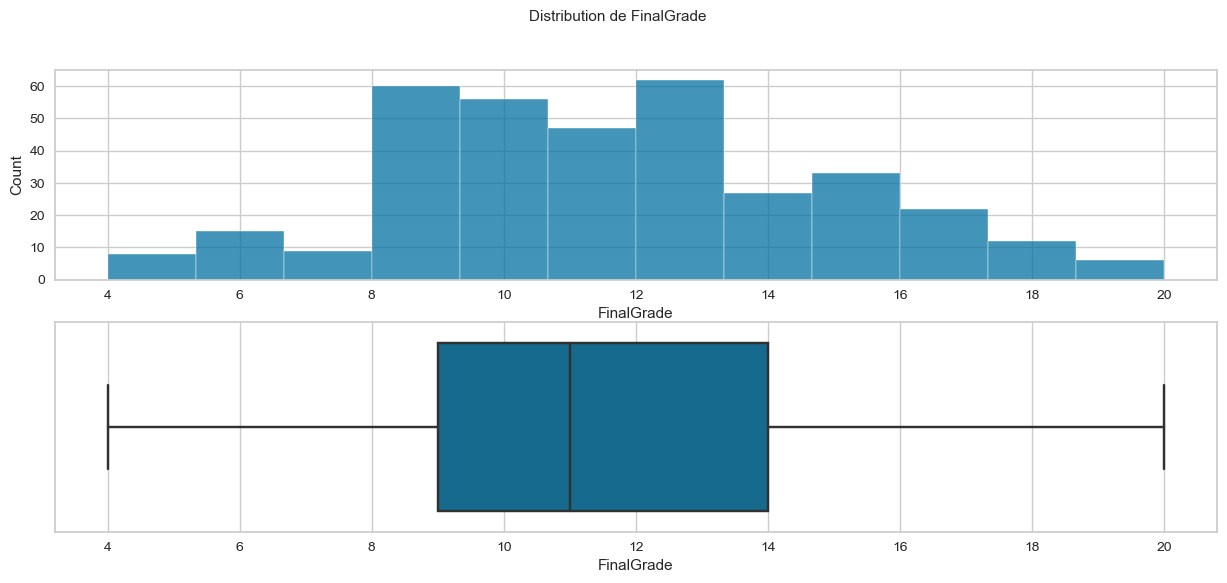

<IPython.core.display.Javascript object>

In [14]:
# Visualisation distribution FinalGrade
dis_plot(data, "FinalGrade")

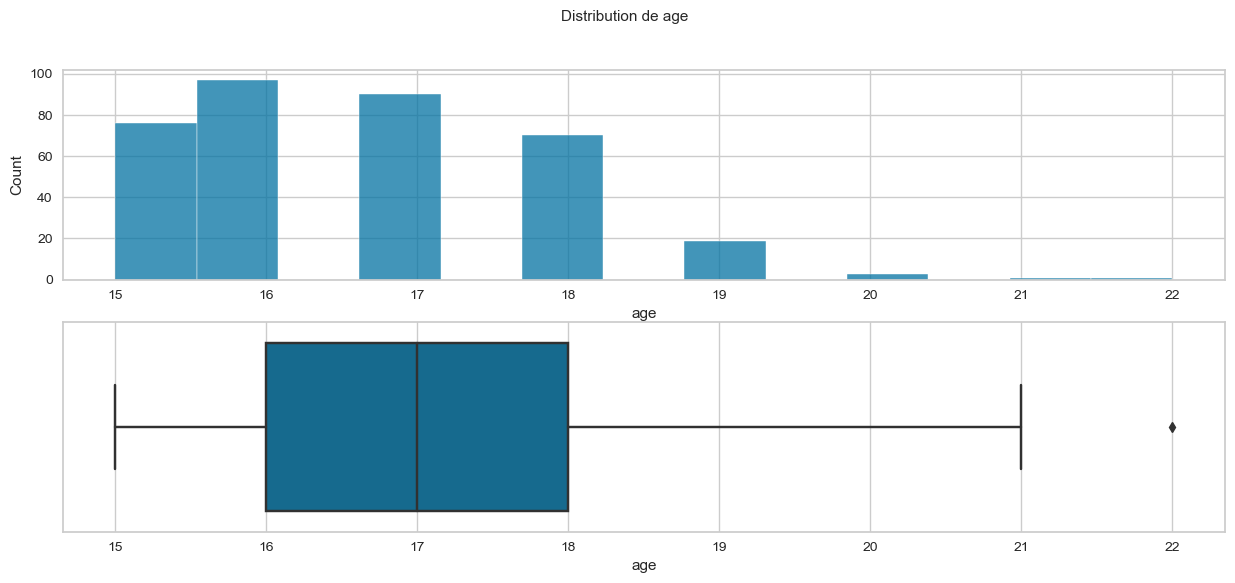

<IPython.core.display.Javascript object>

In [15]:
# Visualisation distribution age
dis_plot(data, "age")

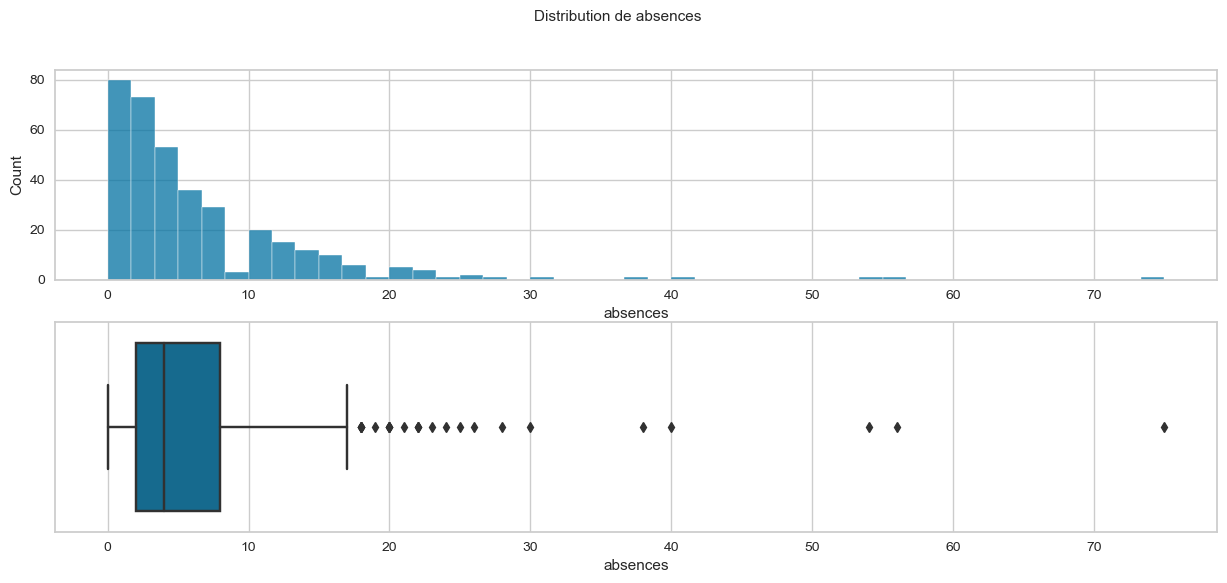

<IPython.core.display.Javascript object>

In [17]:
# Visualisation distribution absences
dis_plot(data, "absences")

In [18]:
def box_plot(df, x, y, hue=None):

    """Fonction pour visualiser sous forme de boxplot
    la distribution d'une colonne numérique d'un dataframe

    - Arguments :
        - df : dataframe
        - x : variable quantitative
        - y : variable qualitative
        - hue : variable qualitative séparatrice des données

    - Affiche :
        - 1 graphe de type boxplot

    """

    sns.boxplot(x=x, y=y, data=df, hue=hue)
    plt.xlabel(x, size=10)
    plt.ylabel(y, size=10)
    plt.title("Distribution de " + x + " pour " + y, size=10)
    plt.show()

<IPython.core.display.Javascript object>

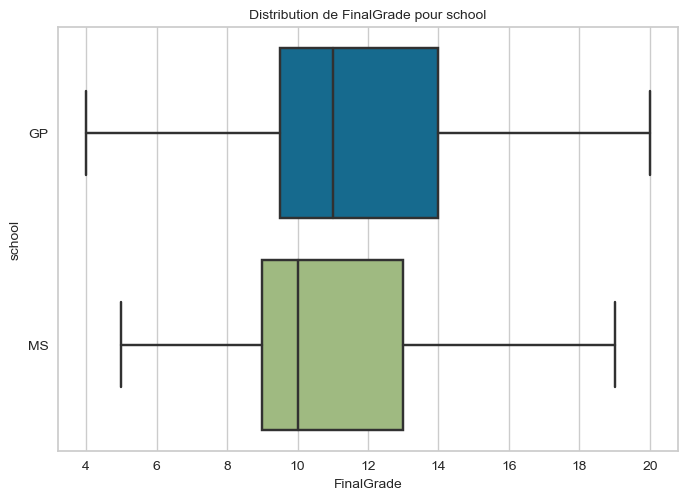

<IPython.core.display.Javascript object>

In [18]:
# Visualisation distribution FinalGrade selon school
box_plot(data, "FinalGrade", "school")

Pas de grande différence entre les 2 écoles.

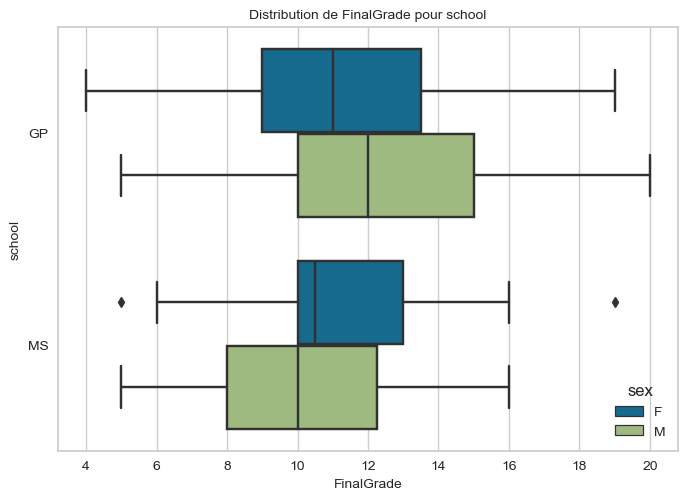

<IPython.core.display.Javascript object>

In [19]:
# Visualisation distribution FinalGrade selon school
# et sex
box_plot(data, "FinalGrade", "school", "sex")

Dans GP, garçons globalement meilleurs que les filles.

Dans MS c'est l'inverse.

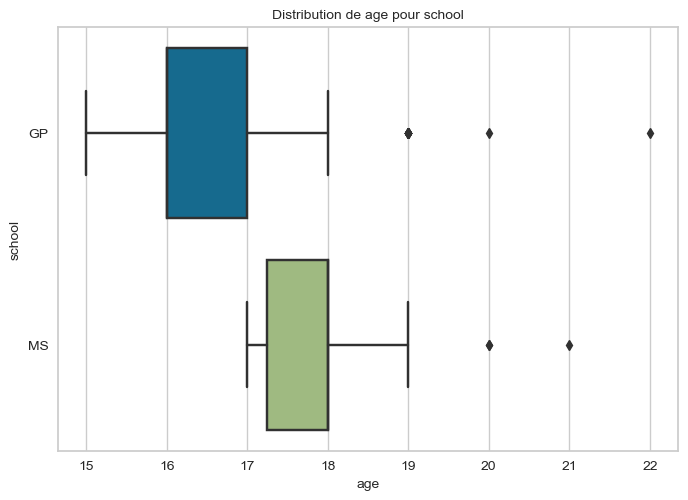

<IPython.core.display.Javascript object>

In [19]:
# Visualisation distribution age selon school
box_plot(data, "age", "school")

Dans MS, les étudiants sont globalement plus âgés.

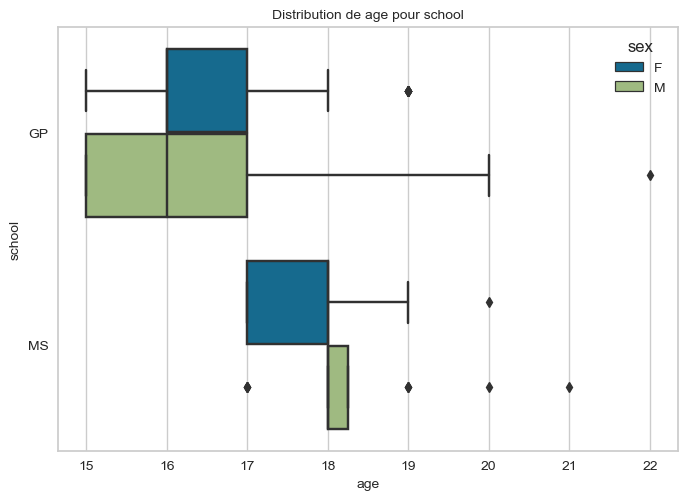

<IPython.core.display.Javascript object>

In [20]:
# Visualisation distribution FinalGrade selon school
# et selon sex
box_plot(data, "age", "school", "sex")

Dans MS, garçons plus âgés que les filles.

Dans GP, plus grande variété d'âges chez les garçons.

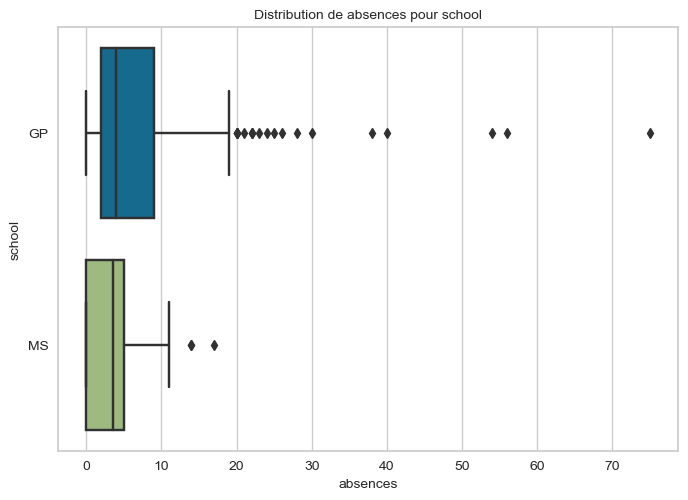

<IPython.core.display.Javascript object>

In [21]:
# Visualisation distribution absences selon school
box_plot(data, "absences", "school")

Globalement, plus d'absences dans GP.

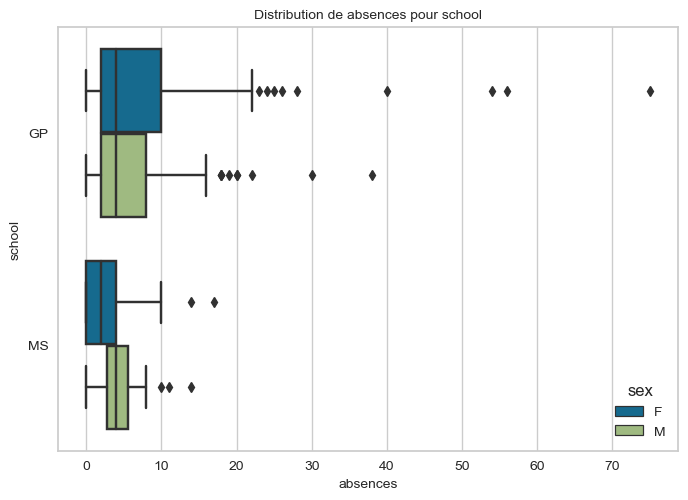

<IPython.core.display.Javascript object>

In [22]:
# Visualisation distribution absences selon school
# et selon sex
box_plot(data, "absences", "school", "sex")

Plus grande disparité d'absences chez les filles.

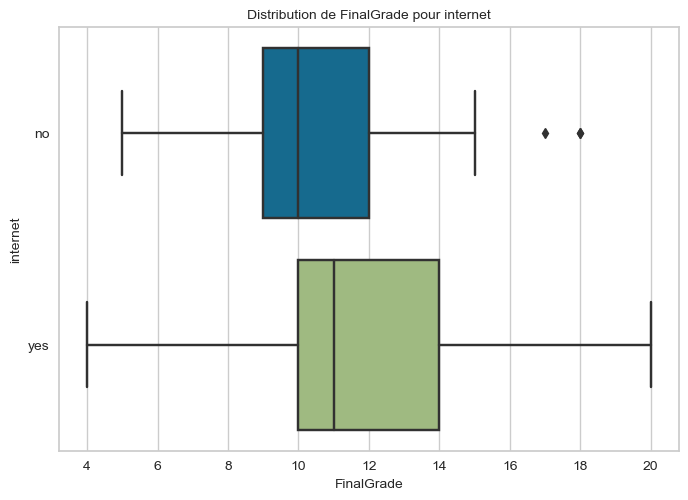

<IPython.core.display.Javascript object>

In [23]:
# Visualisation distribution FinalGrade selon internet
box_plot(data, "FinalGrade", "internet")

Plus grande variété de notes quand les étudiants ont accès à internet et globalement de meilleures notes.

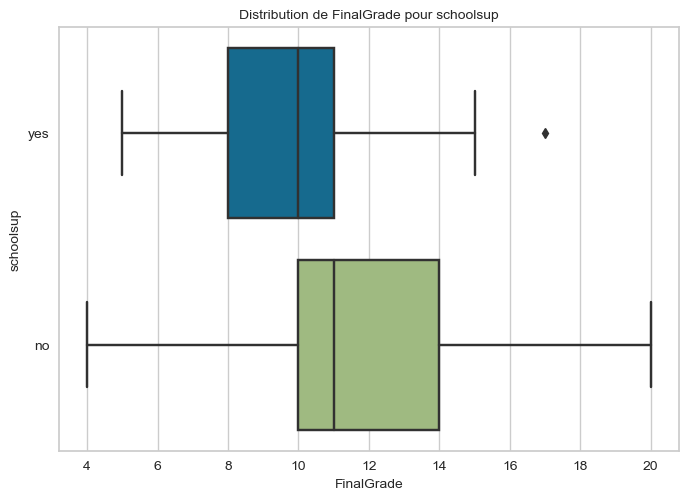

<IPython.core.display.Javascript object>

In [24]:
# Visualisation distribution FinalGrade selon schoolsup
box_plot(data, "FinalGrade", "schoolsup")

Plus grande variété de notes quand les étudiants n'ont pas de cours particuliers en plus.

Globalement de plus mauvaises notes pour ceux qui ont des cours en plus.

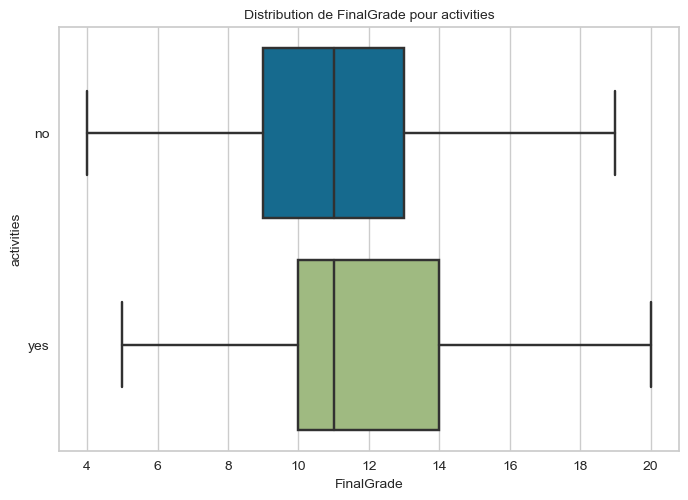

<IPython.core.display.Javascript object>

In [25]:
# Visualisation distribution FinalGrade selon activities
box_plot(data, "FinalGrade", "activities")

Pas de grande différence.

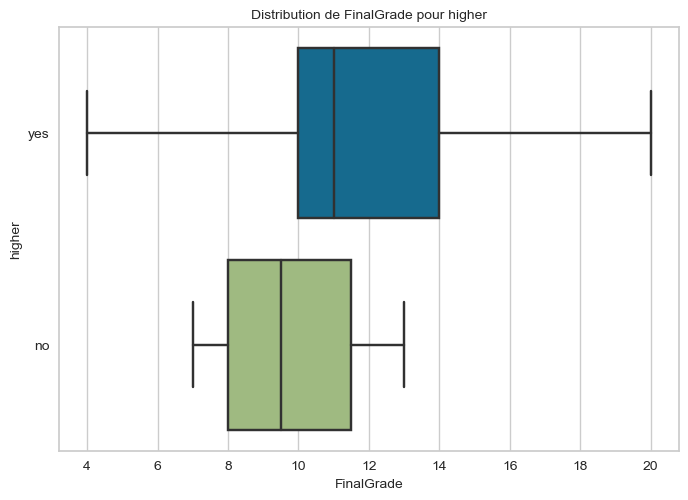

<IPython.core.display.Javascript object>

In [26]:
# Visualisation distribution FinalGrade selon higher
box_plot(data, "FinalGrade", "higher")

Ceux qui ne veulent pas faire d'études supérieures ont globalement des notes plus faibles et centrées vers 9-10.

#### Variables catégorielles

In [27]:
# liste des variables catégorielles
cat_columns = [
    "school",
    "sex",
    "address",
    "famsize",
    "Pstatus",
    "Mjob",
    "Fjob",
    "reason",
    "guardian",
    "schoolsup",
    "famsup",
    "paid",
    "activities",
    "nursery",
    "higher",
    "internet",
    "romantic",
]

<IPython.core.display.Javascript object>

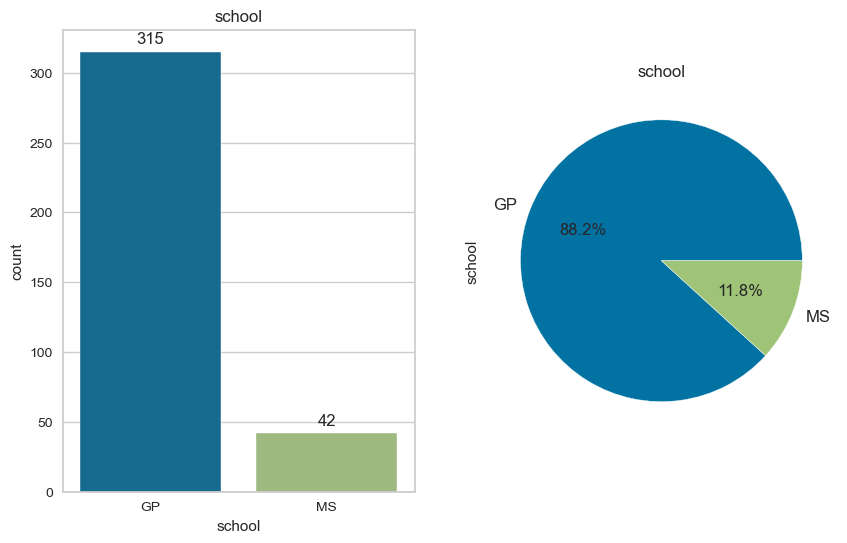

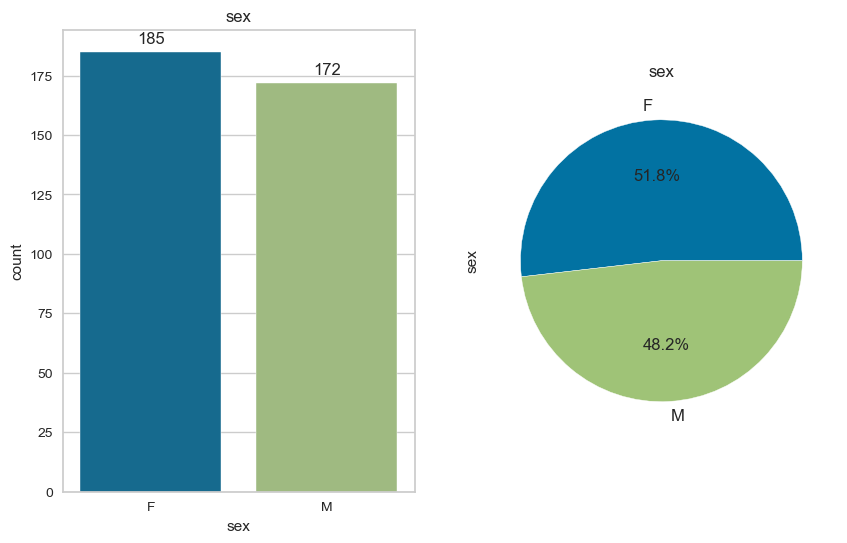

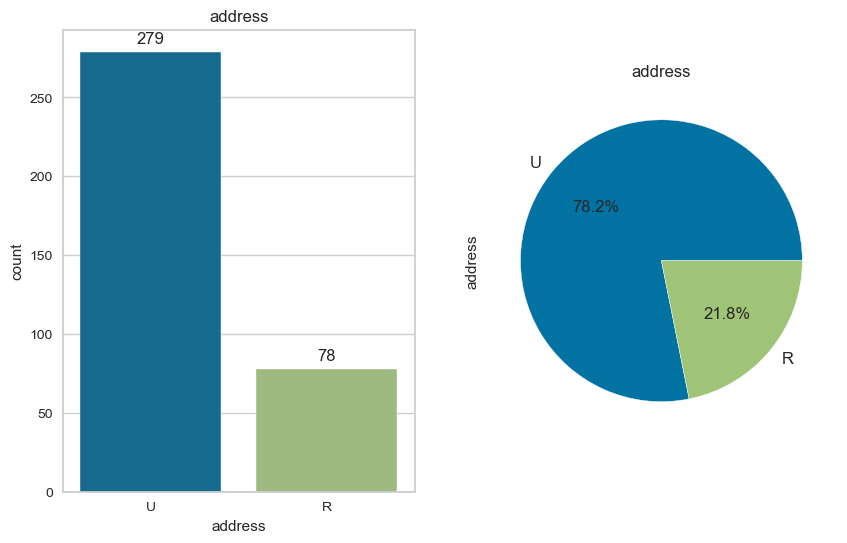

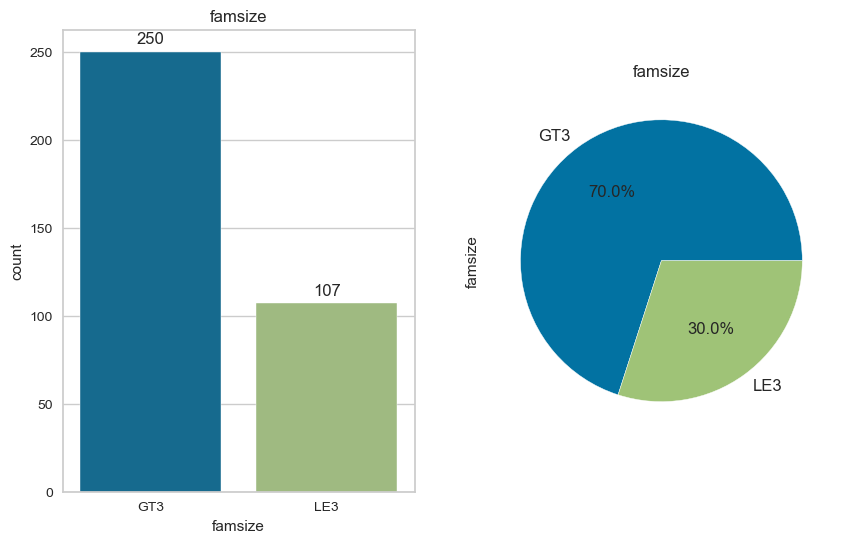

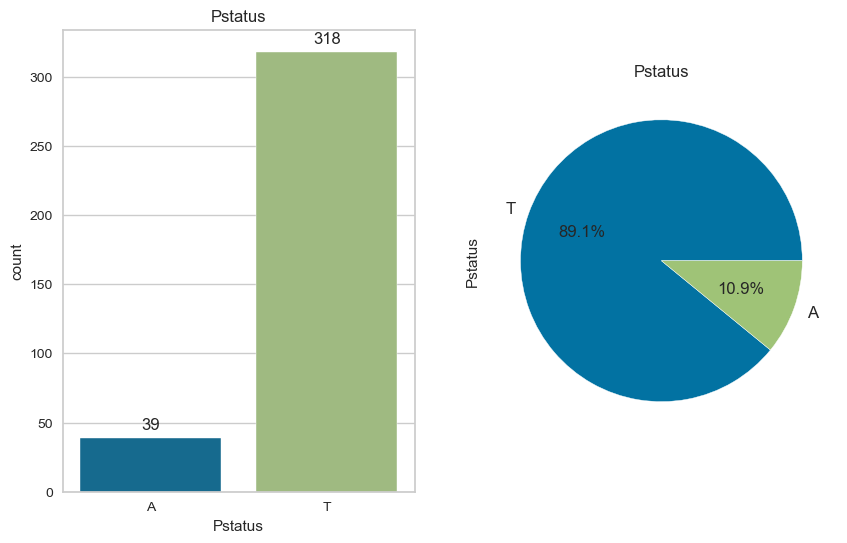

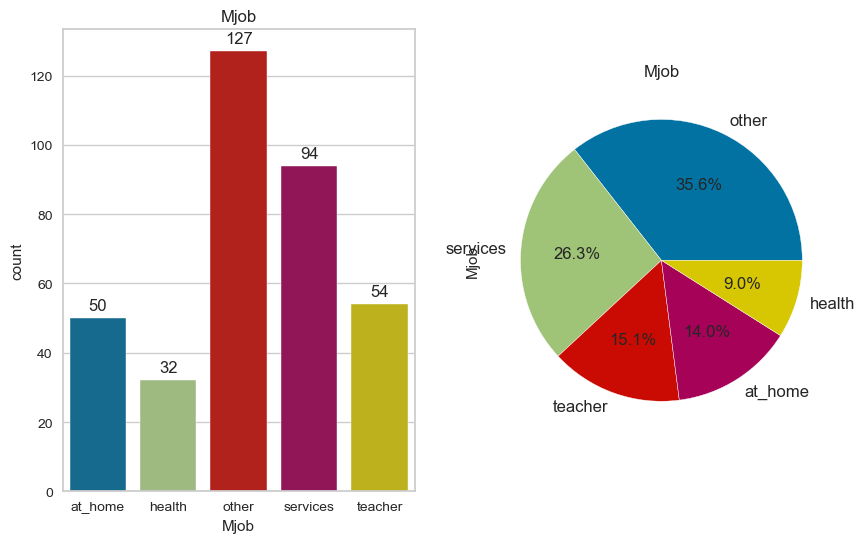

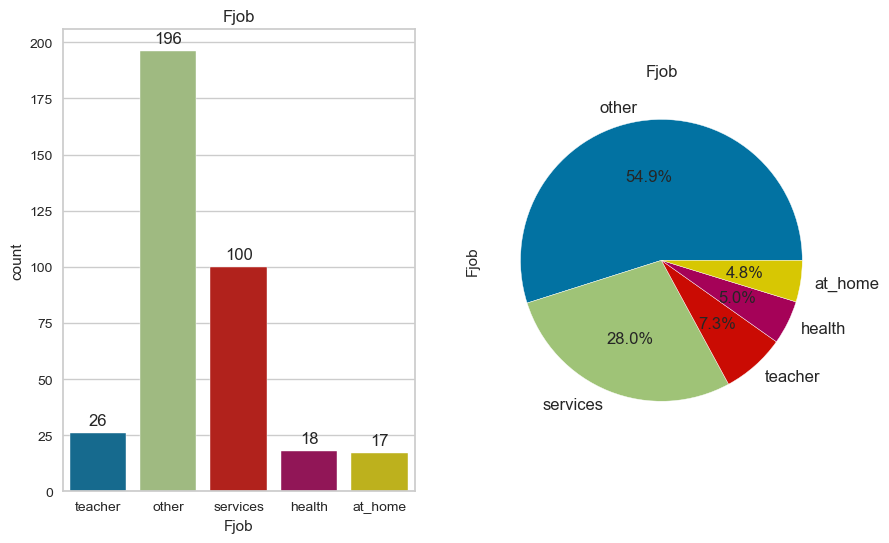

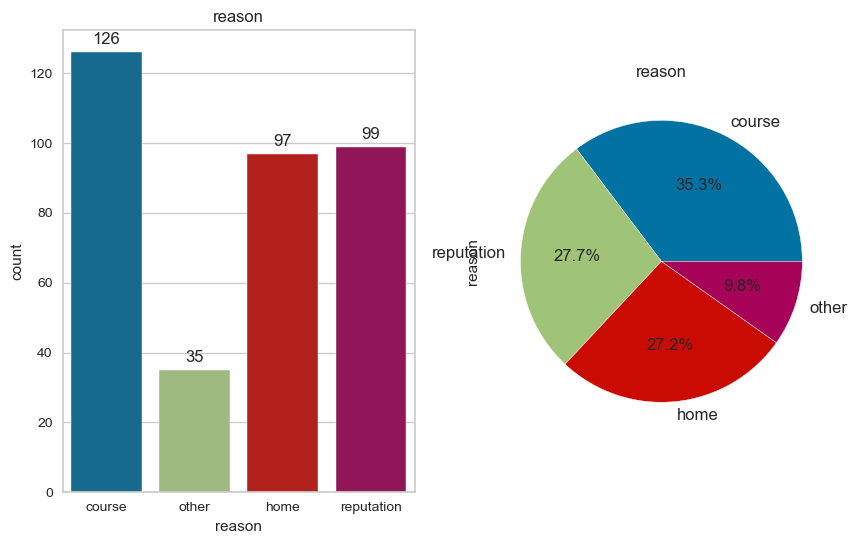

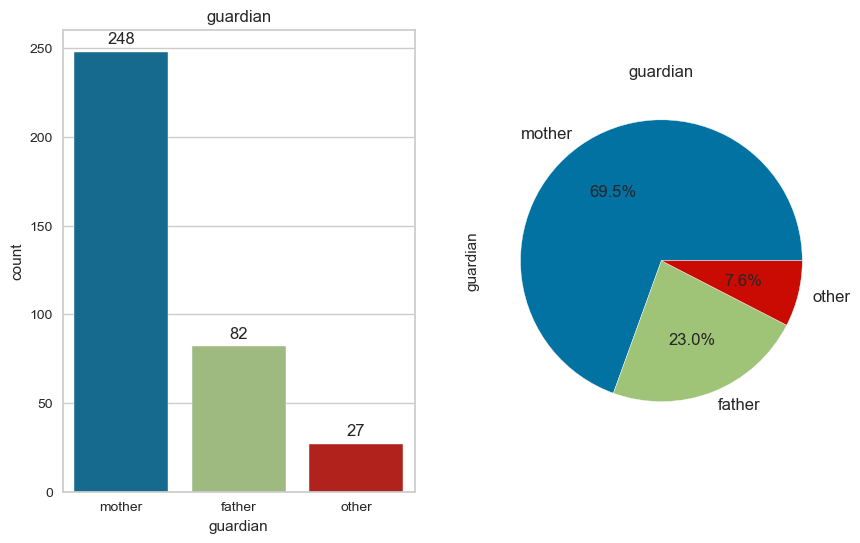

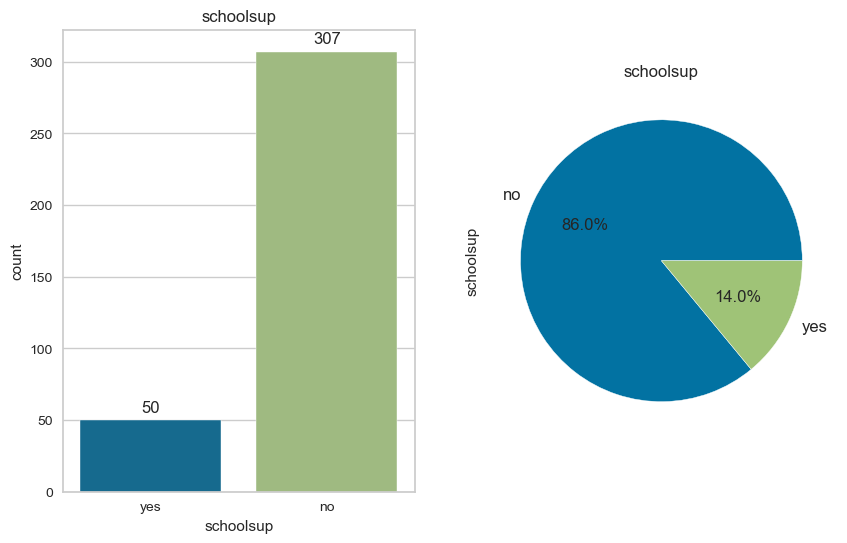

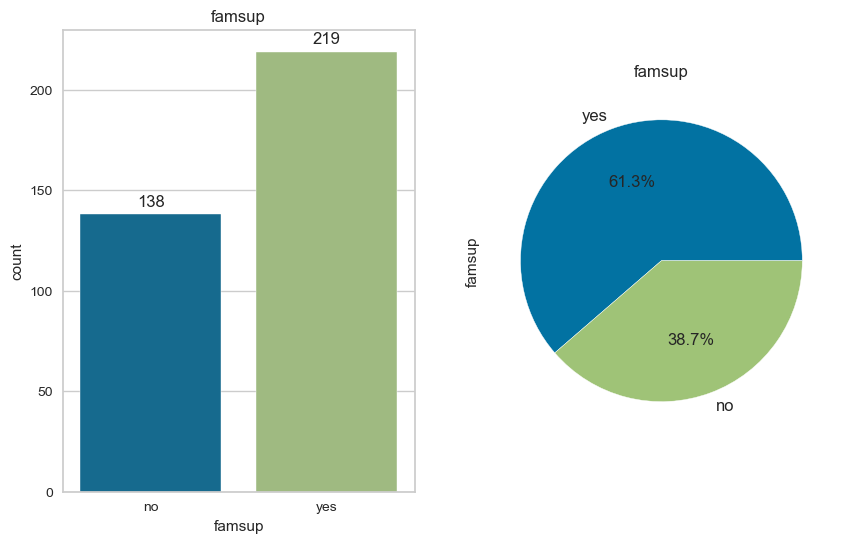

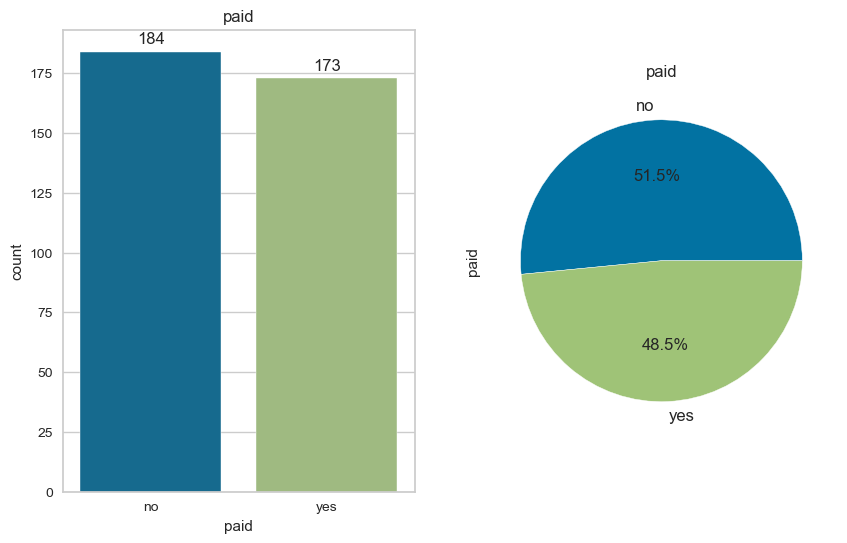

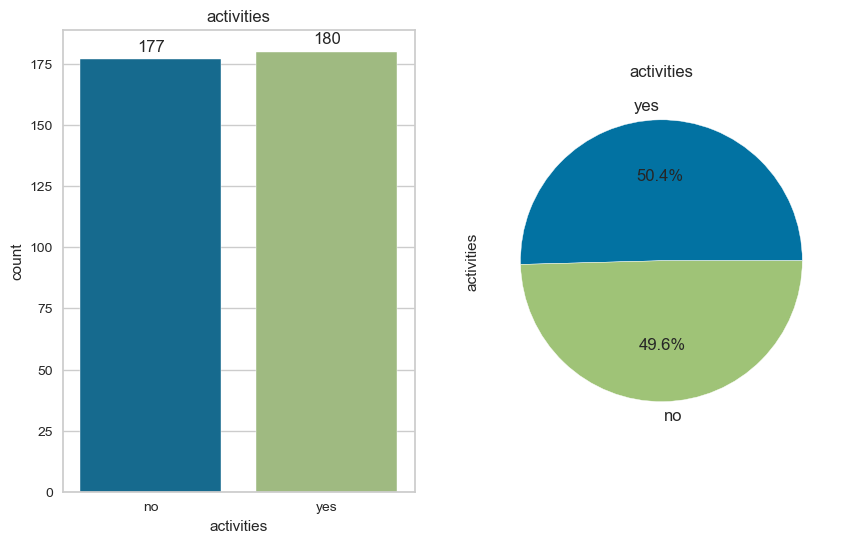

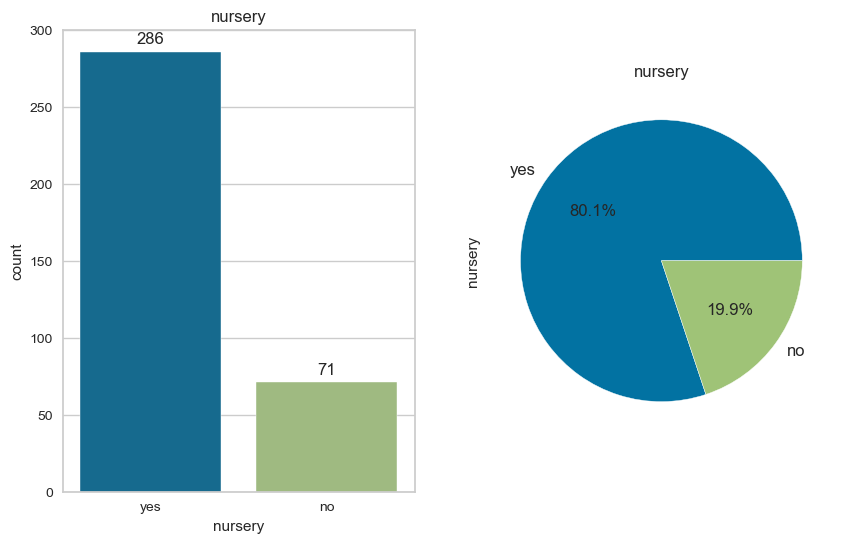

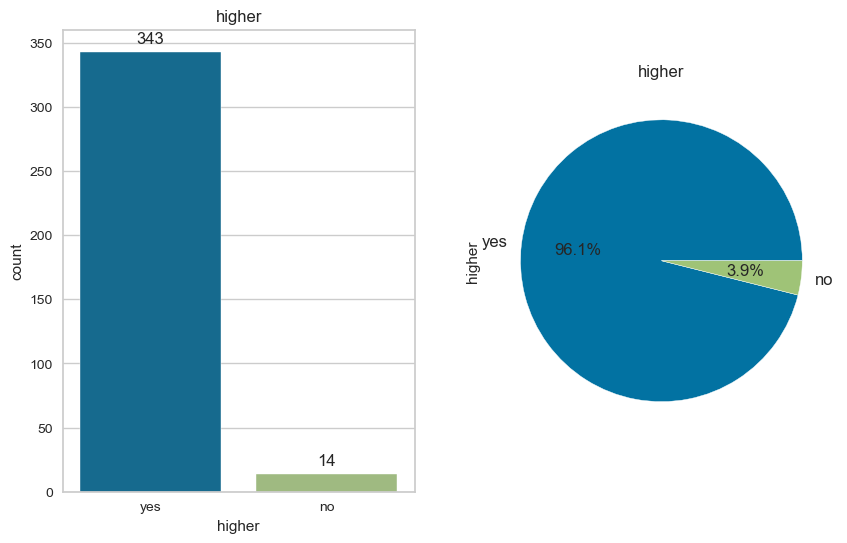

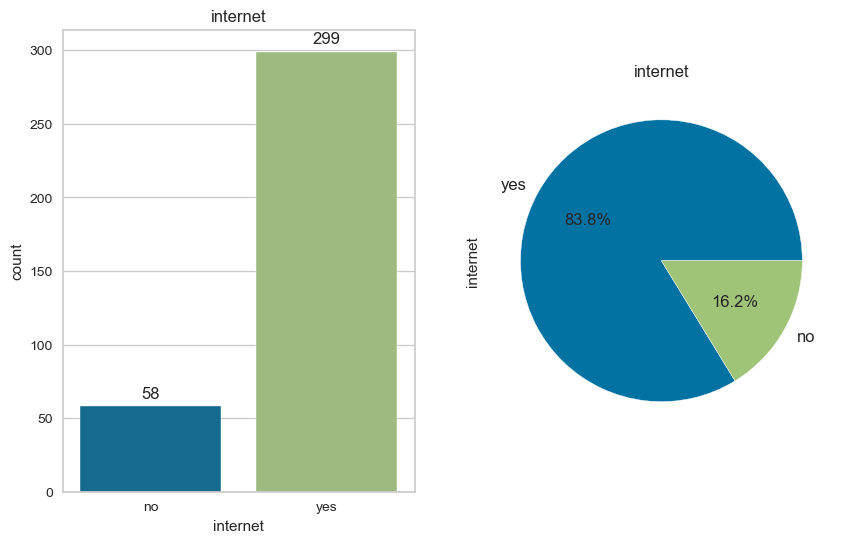

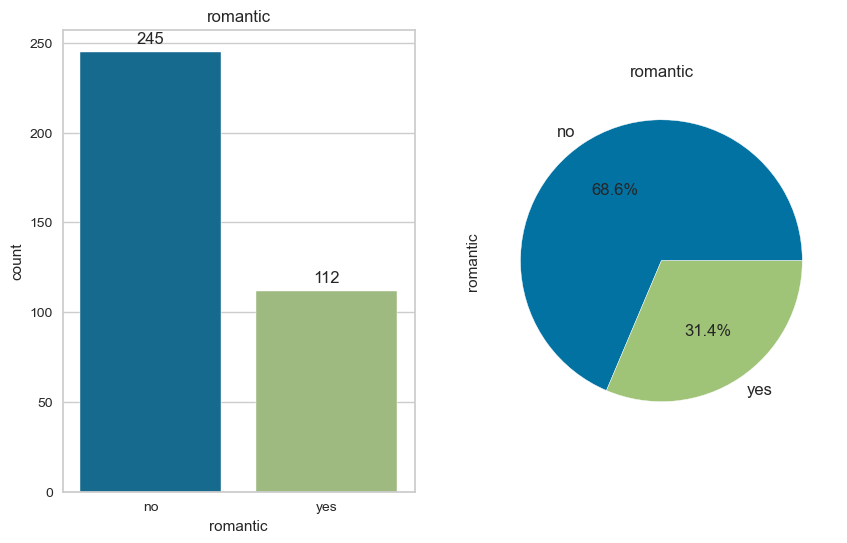

<IPython.core.display.Javascript object>

In [28]:
# Affichage de la distribution des variables catégorielles
for col in cat_columns:

    # Répartition des notes clients
    f, ax = plt.subplots(figsize=(10, 6))

    # Countplot
    plt.subplot(121)
    g = sns.countplot(x=col, data=data)
    # ajout des étiquettes pour afficher valeurs de MAE
    for p in g.patches:
        g.annotate(
            format((p.get_height()), ".0f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
            fontsize=12,
        )
    plt.title(col)

    # Piechart
    plt.subplot(122)
    data[col].value_counts().plot(kind="pie", autopct="%.1f%%", fontsize=12)
    plt.title(col)
    plt.show()

On remarque que (analyse non poussée) :
- majoritairement des élèves vivants en milieu urbain
- autant d'élèves avec et sans activités extra scolaires
- très grande majorité qui veut faire des études supérieures
- très grande majorité avec accès internet.

#### Analyse bivariée

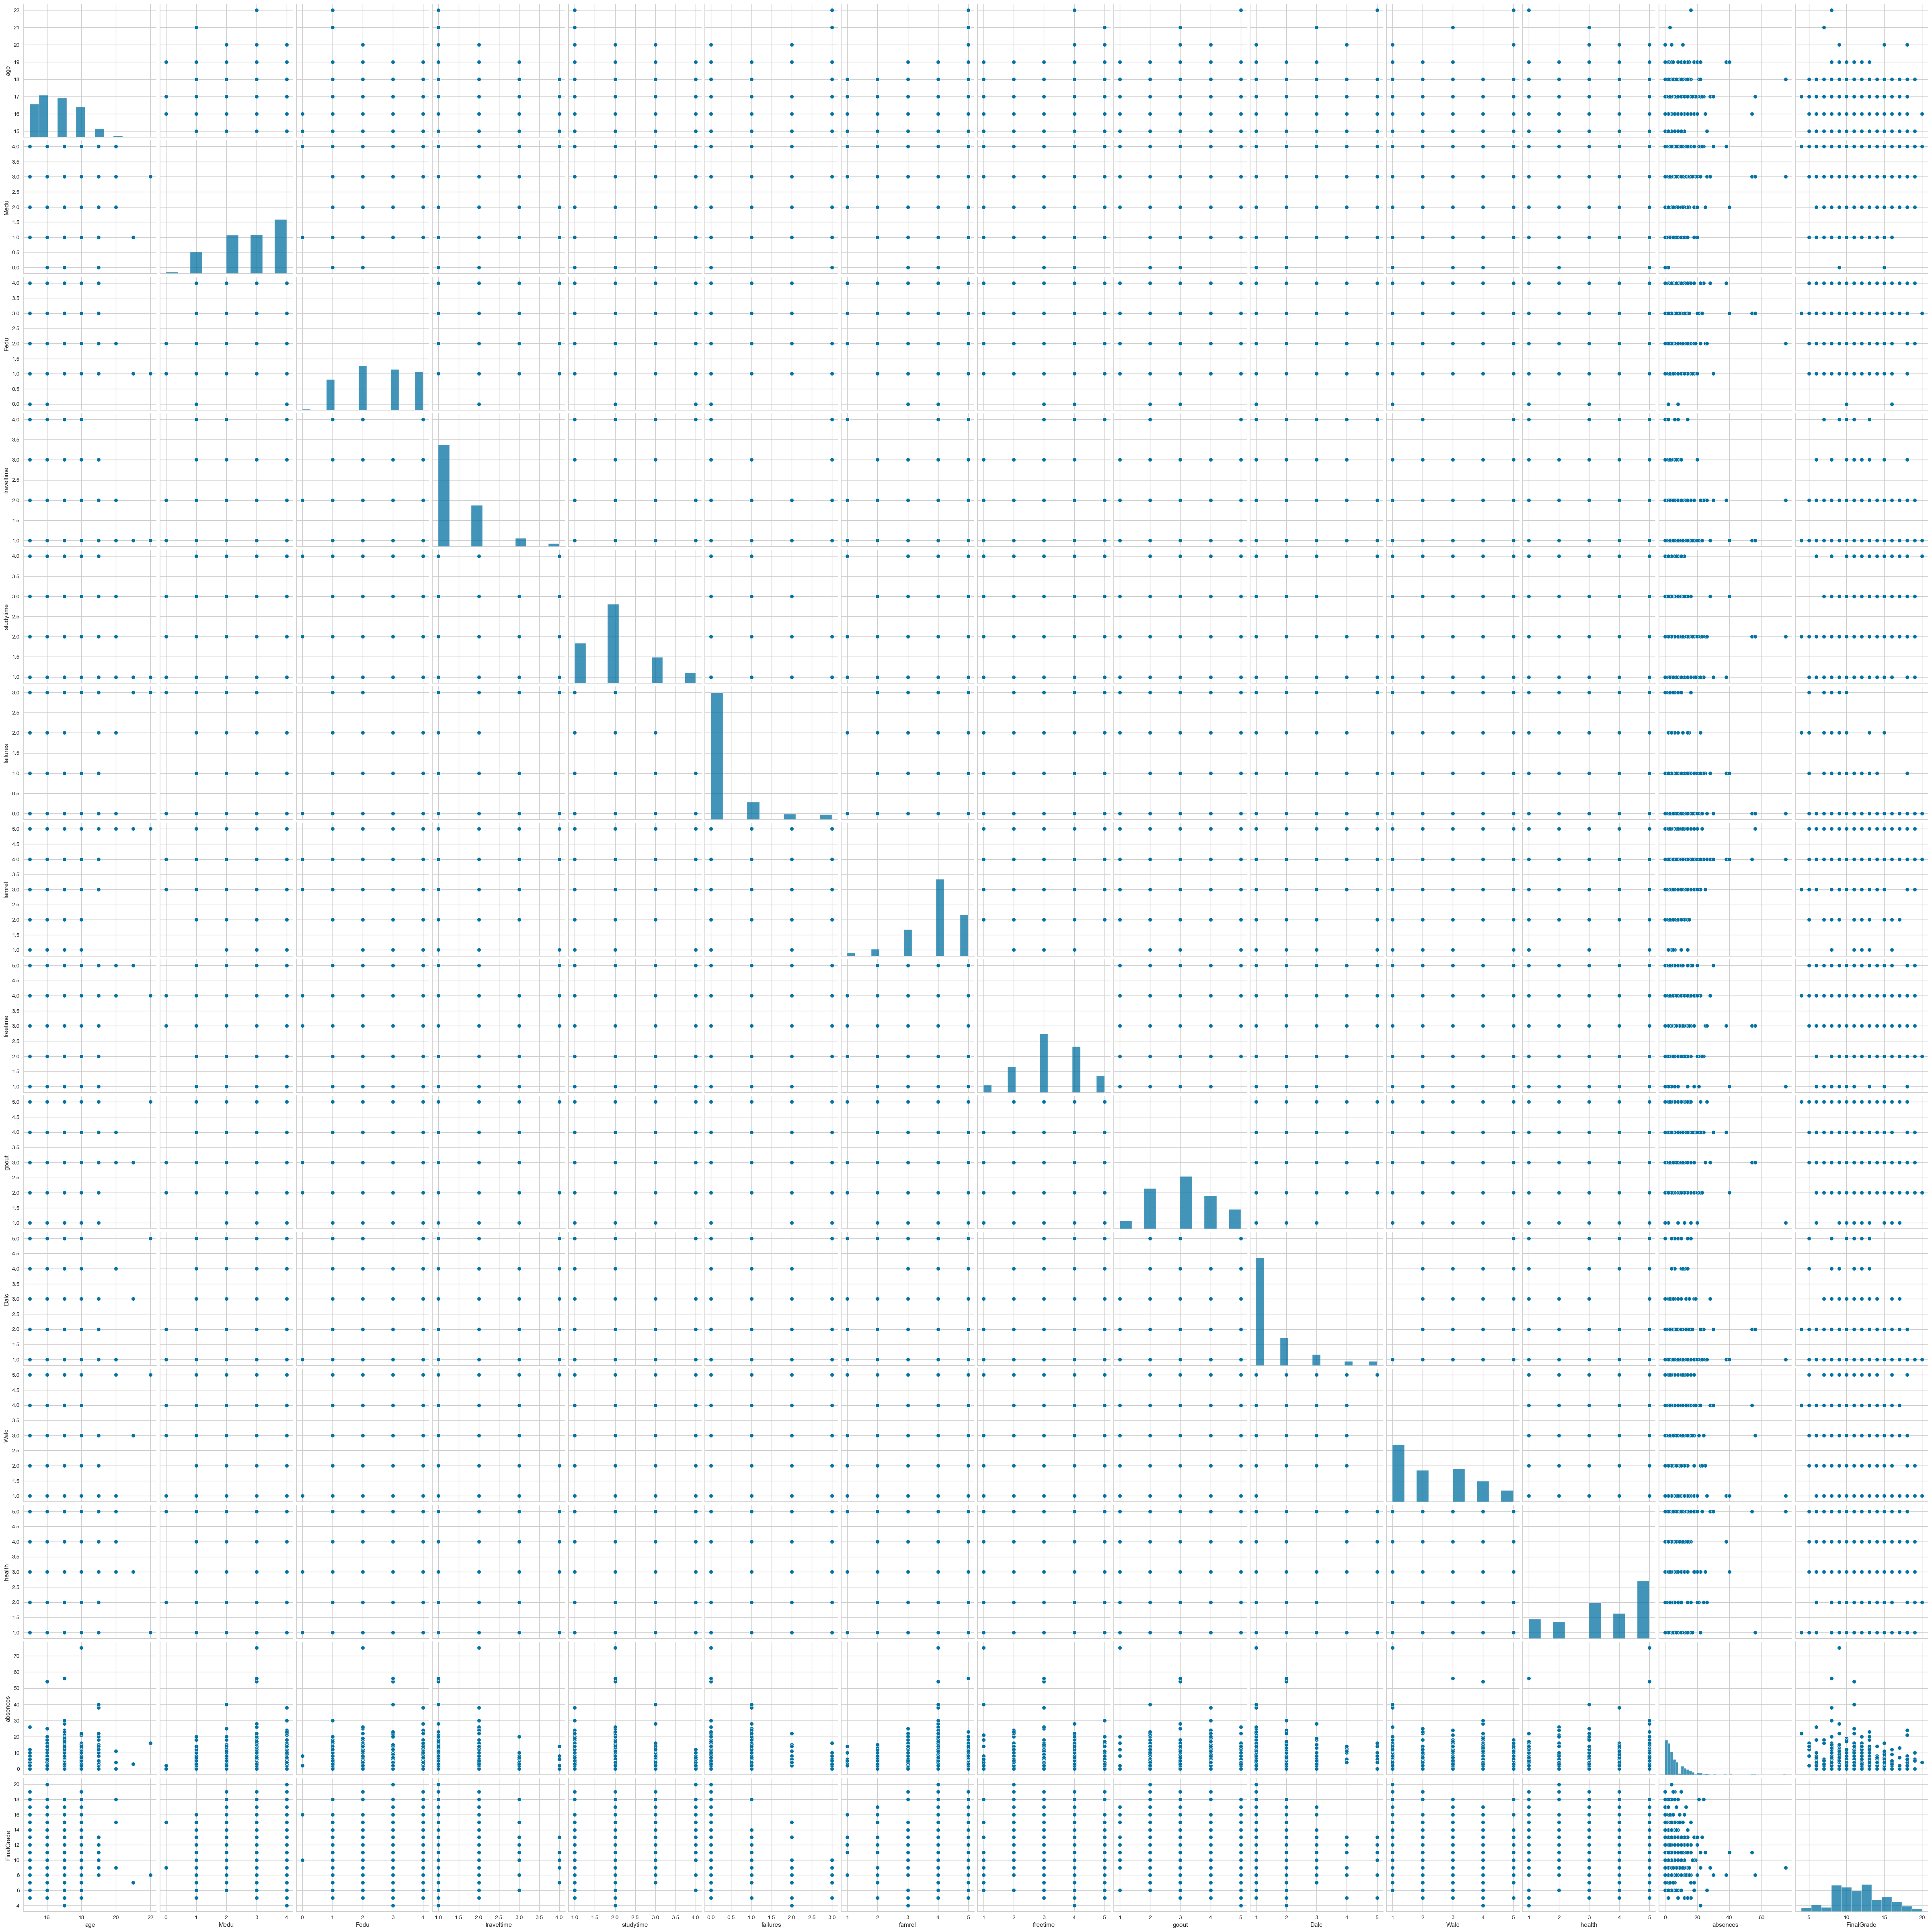

<IPython.core.display.Javascript object>

In [29]:
# Visualisation des colonnes numériques sous forme de pairplot
sns.pairplot(data, height=3.5)
plt.show()

Pas d'information probabante ne ressort a priori.

In [30]:
def mat_corr(df):

    """Fonction pour tracer la matrice des corrélations entre
    les colonnes numériques d'un dataframe

    - Arguments :
        - df : dataframe

    - Affiche :
        - 1 graphe de type heatmap indiquant pour chaque paire de
        colonnes numériques la valeurs du coefficient de corrélation
    """

    # variables dont on veut étudier les corrélations
    corr = df.select_dtypes("number").corr()

    # Génération d'un masque pour masquer le triangle supérieur et
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap)
    # avec le masque et affichage des valeurs de corrélation
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar=False,
        annot=True,
    )
    plt.title("Matrice des corrélations")
    plt.show()

<IPython.core.display.Javascript object>

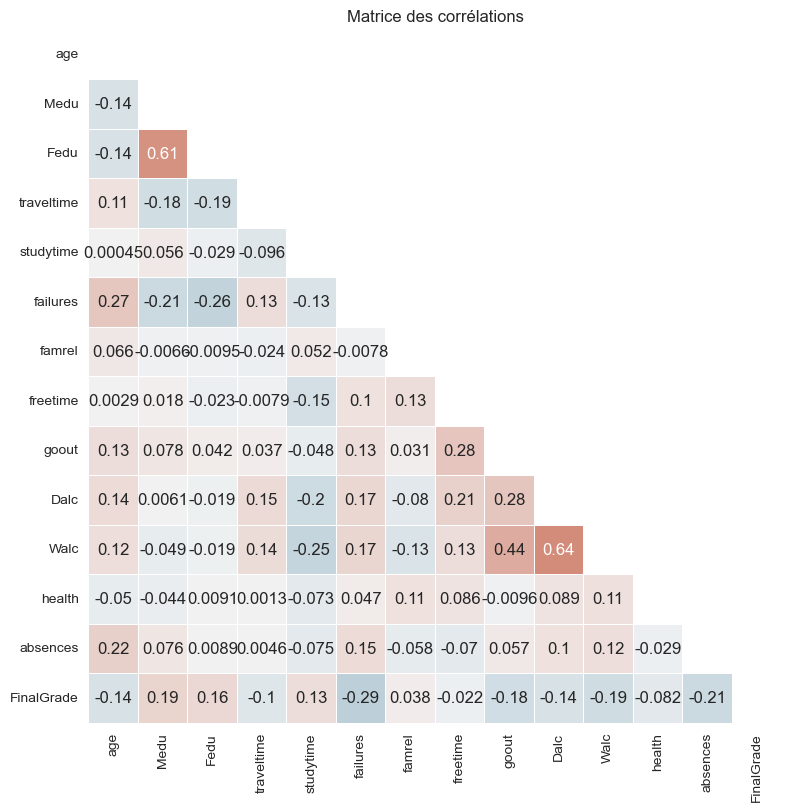

<IPython.core.display.Javascript object>

In [31]:
# matrice des corrélations entre les variables numériques
mat_corr(data)

Peu de corrélation, à part sur la consommation d'alcool semaine/weekend.

### Restriction à quelques variables
On va pour une première analyse se restreindre à des indicateurs actionnables sur la "target" qui est FinalGrade.

In [32]:
# indicateurs actionnables
action = ["Dalc", "Walc", "absences", "studytime"]
# target
target = ["FinalGrade"]

<IPython.core.display.Javascript object>

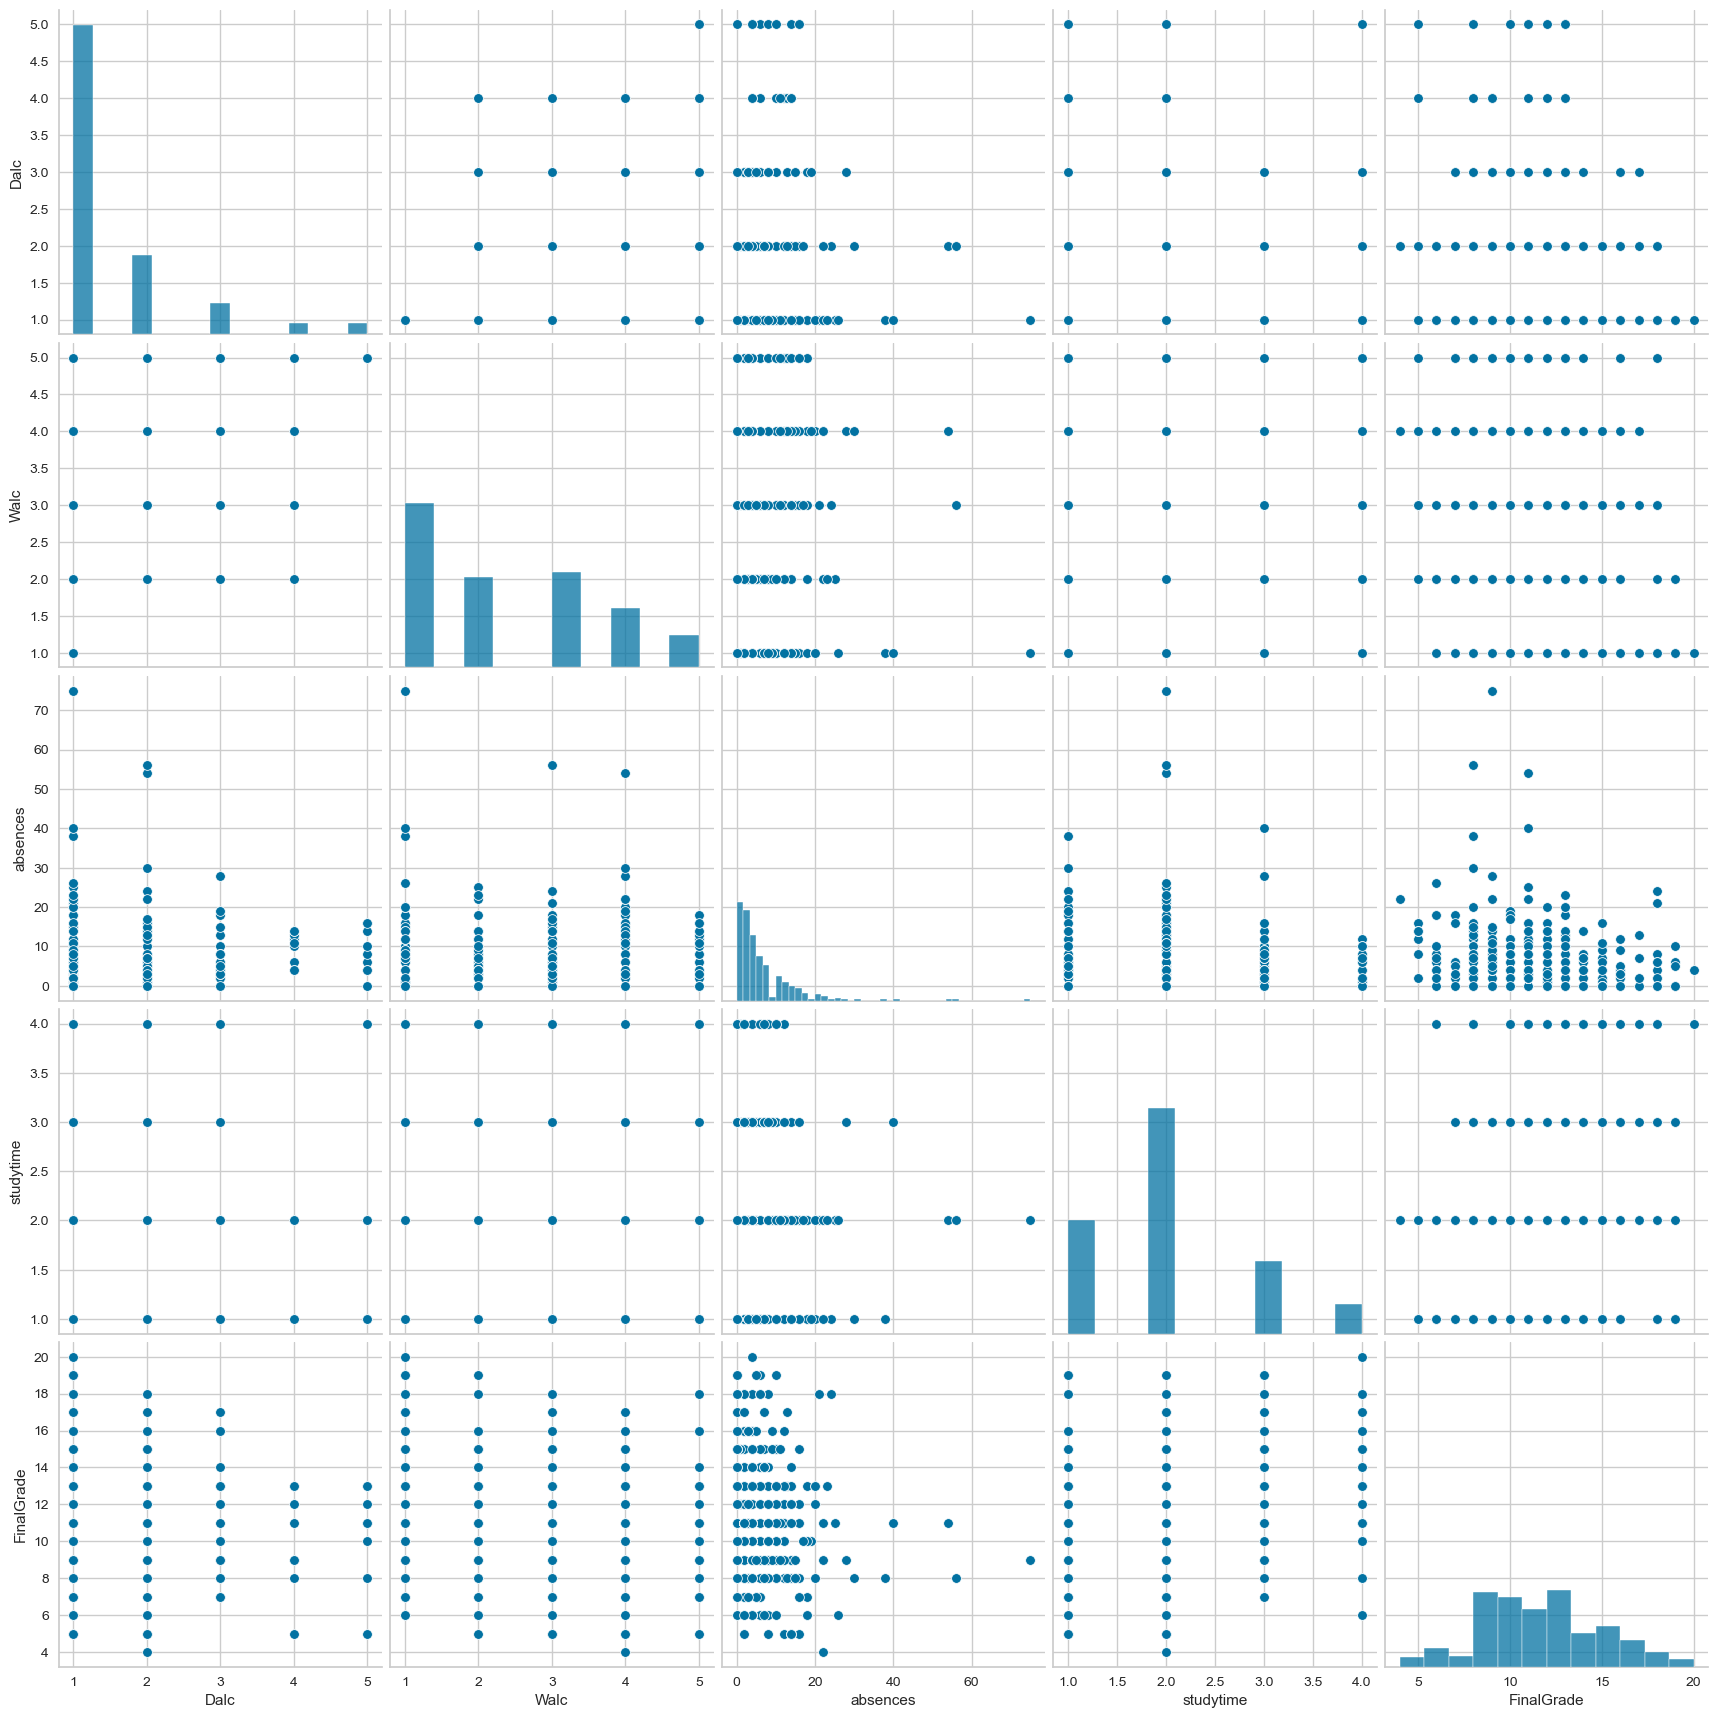

<IPython.core.display.Javascript object>

In [33]:
# Visualisation des indicateurs et de la target sous forme de pairplot
sns.pairplot(data[action + target], height=3.5)
plt.show()

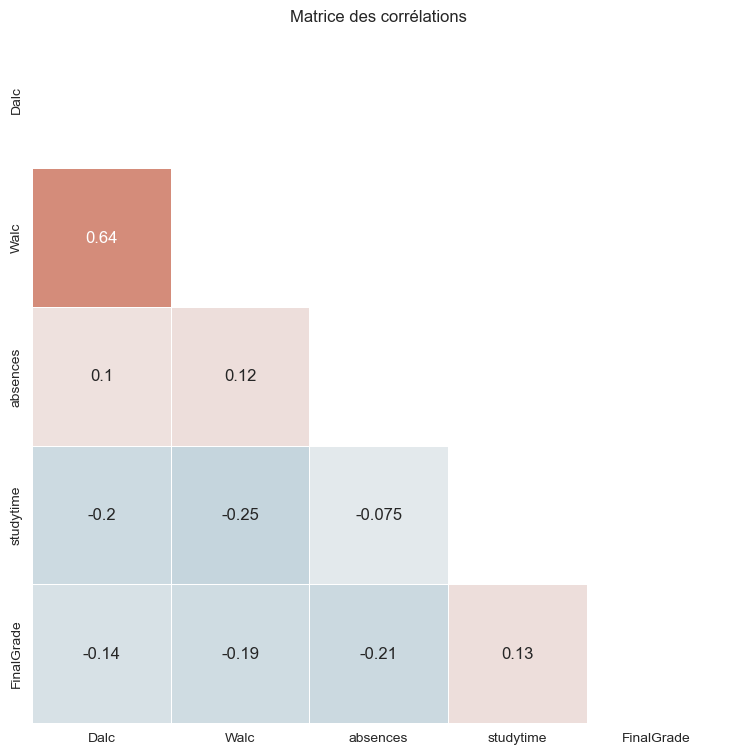

<IPython.core.display.Javascript object>

In [34]:
# Visualisation de la matrice des corrélations
mat_corr(data[action + target])

In [35]:
def scat_plot(df, x, y, c):

    """Fonction pour visualiser sous forme de scatterplot
    deux variables numériques selon une 3ème

    - Arguments :
        - df : dataframe
        - x : abscisse
        - y : ordonnée
        - c :3ème variable

    - Affiche :
        - 1 graphe de type displot

    """
    plt.figure(figsize=(15, 8))
    g = plt.scatter(
        data=data,
        x=x,
        y=y,
        c=c,
        alpha=0.6,
        cmap="tab20",
    )
    plt.xlabel(x, size=14)
    plt.ylabel(y, size=14)
    plt.legend(*g.legend_elements(), title=c)
    plt.show()

<IPython.core.display.Javascript object>

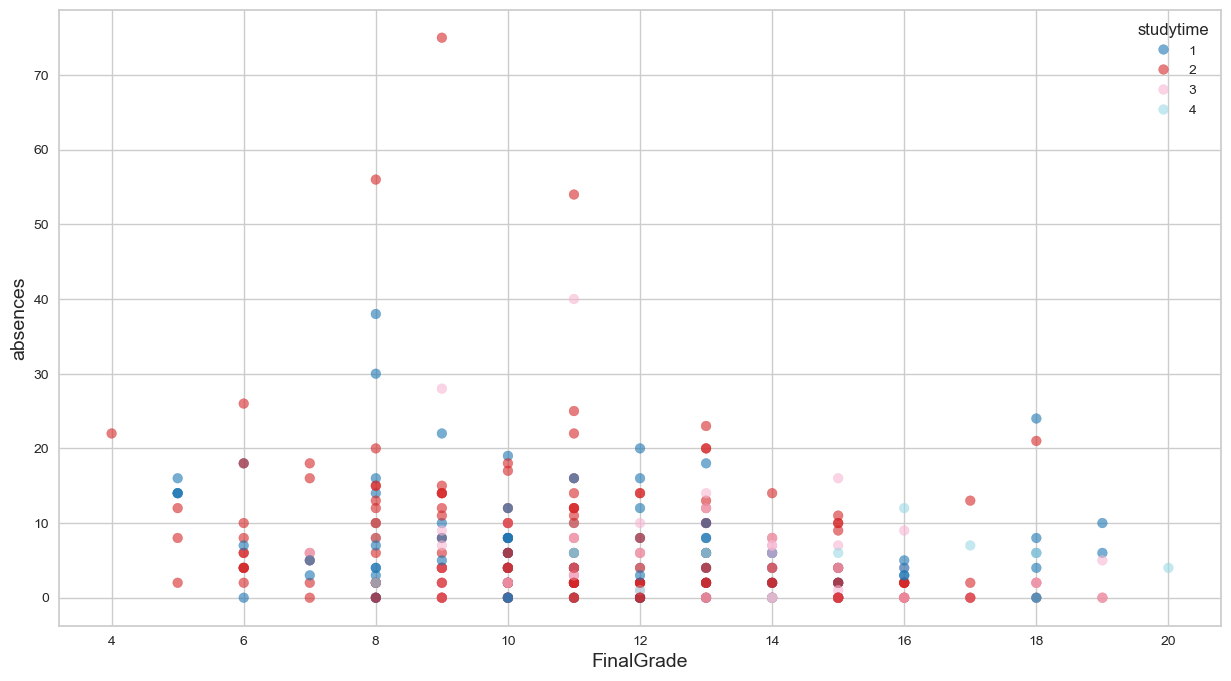

<IPython.core.display.Javascript object>

In [36]:
# Visualisation de absences en fonction de FinalGrade selon studytime
scat_plot(data, "FinalGrade", "absences", "studytime")

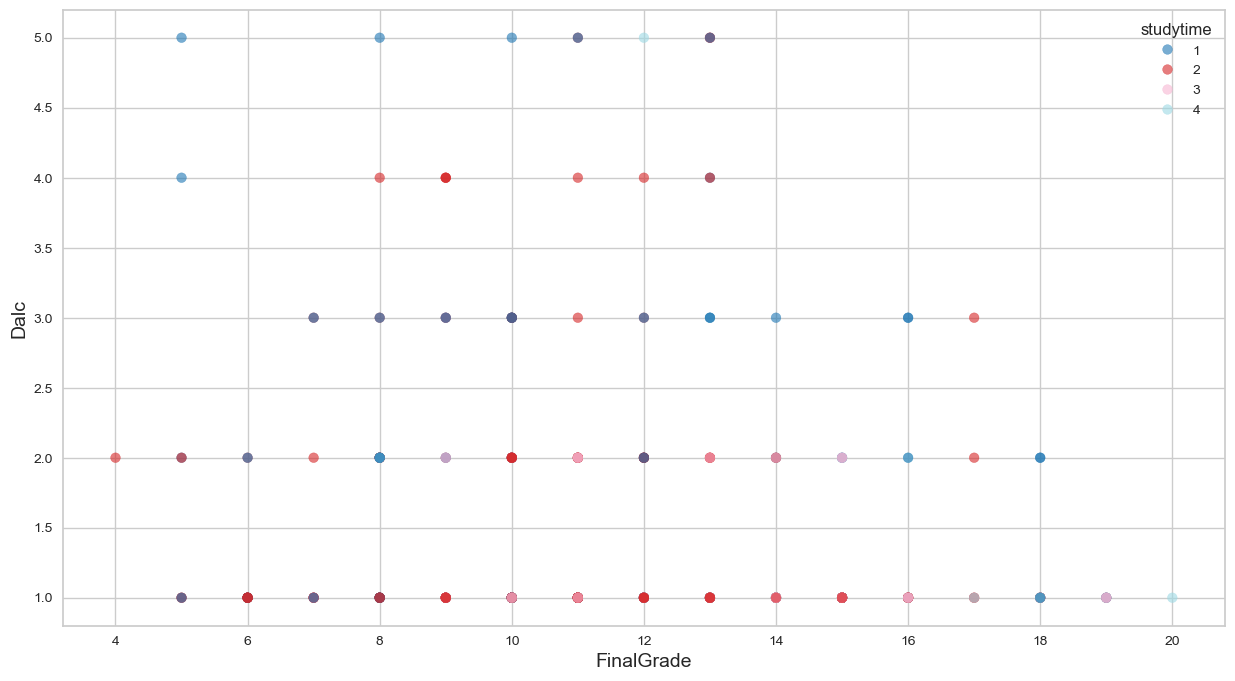

<IPython.core.display.Javascript object>

In [37]:
# Visualisation de Dalc en fonction de FinalGrade selon studytime
scat_plot(data, "FinalGrade", "Dalc", "studytime")

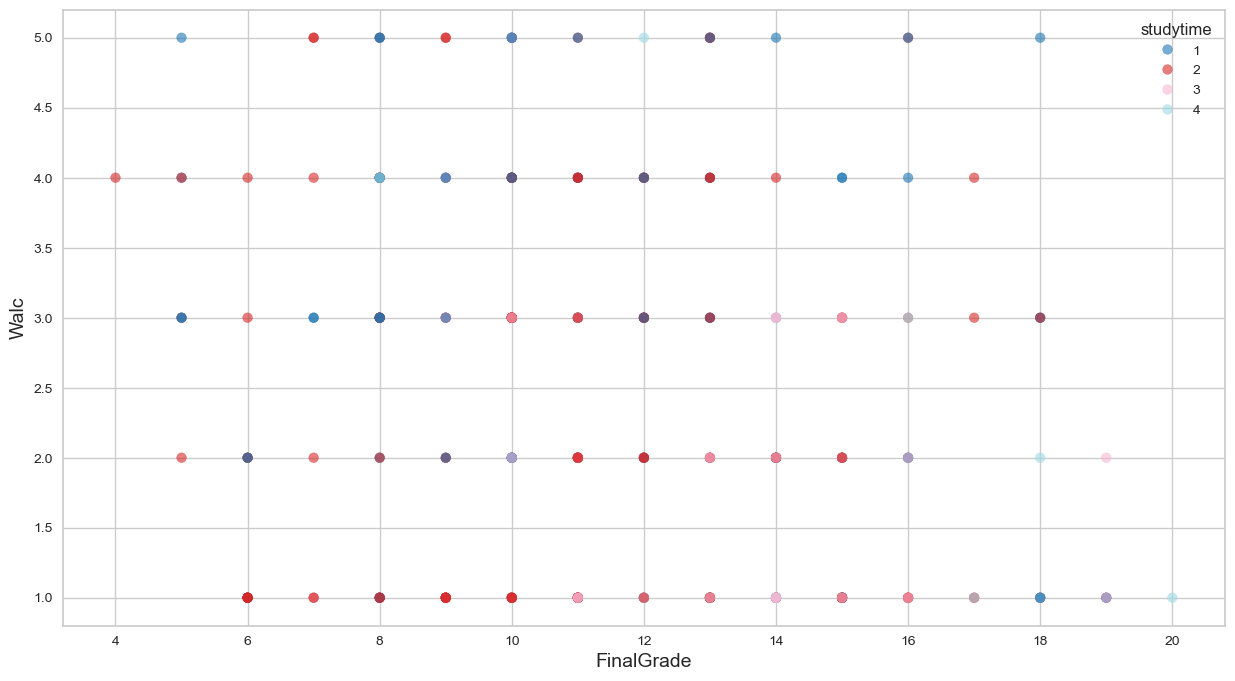

<IPython.core.display.Javascript object>

In [38]:
# Visualisation de Walc en fonction de FinalGrade selon studytime
scat_plot(data, "FinalGrade", "Walc", "studytime")

In [39]:
# Dataframe restreint avec les indicateurs
# et la target
df = data[action + target]
df

Dalc  Walc  absences  studytime  FinalGrade
StudentID                                             
0             1     1         6          2           6
1             1     1         4          2           6
2             2     3        10          2          10
3             1     1         2          3          15
4             1     2         4          2          10
...         ...   ...       ...        ...         ...
390           4     5        11          2           9
391           3     4         3          1          16
392           3     3         3          1           7
393           3     4         0          1          10
394           3     3         5          1           9

[357 rows x 5 columns]

<IPython.core.display.Javascript object>

## 4. Feature Engineering

### Score d'absences
On va créer un "score d'absences" : 
- prend ses valeurs entre 1 et 5, d'autant plus élevé que le nombre d'absences est élevé
- score de 1 pour minimum <= nombre d'absences < 1er quartile
- score de 2 pour 1er quartile <= nombre d'absences < médiane
- score de 3 pour médiane <= nombre d'absences < 3ème quartile
- score de 4 pour 3ème quartile <= nombre d'absences < moustache supérieure
- score de 5 pour moustache supérieure <= nombre d'absences

In [40]:
# Médiane
med_abs = df["absences"].median()
med_abs

4.0

<IPython.core.display.Javascript object>

In [41]:
# Moyenne
moy_abs = df["absences"].mean()
moy_abs

6.3165266106442575

<IPython.core.display.Javascript object>

In [42]:
# q1 - 1er quartile
q1_abs = df["absences"].quantile(0.25)
q1_abs

2.0

<IPython.core.display.Javascript object>

In [43]:
# q3 - 3ème quartile
q3_abs = df["absences"].quantile(0.75)
q3_abs

8.0

<IPython.core.display.Javascript object>

In [44]:
# Moustache supérieure
fence_high = q3_abs + 1.5 * (q3_abs - q1_abs)
fence_high

17.0

<IPython.core.display.Javascript object>

In [46]:
# liste des conditions
conditions_list = [
    (df["absences"] >= fence_high),
    (df["absences"] >= q3_abs),
    (df["absences"] >= med_abs),
    (df["absences"] >= q1_abs),
    (df["absences"] >= df["absences"].min()),
]

# liste des choix
# plus le nombre d'absences est élevé, plus le score est élevé
choicelist = [5, 4, 3, 2, 1]

<IPython.core.display.Javascript object>

In [47]:
# Selon nb absences, on attribue score dans choicelist
# selon les  conditions_list
df1 = df.copy()
df1["score_abs"] = np.select(conditions_list, choicelist)
df1

Dalc  Walc  absences  studytime  FinalGrade  score_abs
StudentID                                                        
0             1     1         6          2           6          3
1             1     1         4          2           6          3
2             2     3        10          2          10          4
3             1     1         2          3          15          2
4             1     2         4          2          10          3
...         ...   ...       ...        ...         ...        ...
390           4     5        11          2           9          4
391           3     4         3          1          16          2
392           3     3         3          1           7          2
393           3     4         0          1          10          1
394           3     3         5          1           9          3

[357 rows x 6 columns]

<IPython.core.display.Javascript object>

### Consommation d'alcool
On va prendre "le score moyen" de consommation d'alcool, en prenant la moyenne des scores de consommation pendant la semaine et pendant le weekend

In [48]:
df1["alc"] = (df1["Dalc"] + df1["Walc"]) / 2
df1

Dalc  Walc  absences  studytime  FinalGrade  score_abs  alc
StudentID                                                             
0             1     1         6          2           6          3  1.0
1             1     1         4          2           6          3  1.0
2             2     3        10          2          10          4  2.5
3             1     1         2          3          15          2  1.0
4             1     2         4          2          10          3  1.5
...         ...   ...       ...        ...         ...        ...  ...
390           4     5        11          2           9          4  4.5
391           3     4         3          1          16          2  3.5
392           3     3         3          1           7          2  3.0
393           3     4         0          1          10          1  3.5
394           3     3         5          1           9          3  3.0

[357 rows x 7 columns]

<IPython.core.display.Javascript object>

### Score de temps d'études
La variable studytime prend des valeurs d'autant plus élevées que le temps d'étude est grand. On va créer un "score_study" d'autant plus élevé que l'étudiant travaille peu. Ceci dans le but que les indicateurs "aillent dans le même sens" : d'autant plus élevés que l'on peut agir.

In [50]:
# On intervertit les valeurs de studytime
# en créant une nouvelle variable score_study
d = {1: 4, 2: 3, 3: 2, 4: 1}
df1["score_study"] = df1["studytime"].map(d)
df1

Dalc  Walc  absences  studytime  FinalGrade  score_abs  alc  \
StudentID                                                                
0             1     1         6          2           6          3  1.0   
1             1     1         4          2           6          3  1.0   
2             2     3        10          2          10          4  2.5   
3             1     1         2          3          15          2  1.0   
4             1     2         4          2          10          3  1.5   
...         ...   ...       ...        ...         ...        ...  ...   
390           4     5        11          2           9          4  4.5   
391           3     4         3          1          16          2  3.5   
392           3     3         3          1           7          2  3.0   
393           3     4         0          1          10          1  3.5   
394           3     3         5          1           9          3  3.0   

           score_study  
StudentID               
0                    3  
1                    3  
2                    3  
3                    2  
4                    3  
...                ...  
390                  3  
391                  4  
392                  4  
393                  4  
394                  4  

[357 rows x 8 columns]

<IPython.core.display.Javascript object>

### Création de la variable ImprovabilityScore
Cette variable va représenter un score pour pouvoir aider les étudiants en pouvant agir sur les indicateurs actionnables cités précédemment.

Ce score va être défini comme étant la somme des nouvelles variables, celles-ci allant toutes dans le même sens.

In [51]:
# Création de la colonne "ImprovabilityScore" :
df1["ImprovabilityScore"] = df1["alc"] + df1["score_study"] + df1["score_abs"]
df1

Dalc  Walc  absences  studytime  FinalGrade  score_abs  alc  \
StudentID                                                                
0             1     1         6          2           6          3  1.0   
1             1     1         4          2           6          3  1.0   
2             2     3        10          2          10          4  2.5   
3             1     1         2          3          15          2  1.0   
4             1     2         4          2          10          3  1.5   
...         ...   ...       ...        ...         ...        ...  ...   
390           4     5        11          2           9          4  4.5   
391           3     4         3          1          16          2  3.5   
392           3     3         3          1           7          2  3.0   
393           3     4         0          1          10          1  3.5   
394           3     3         5          1           9          3  3.0   

           score_study  ImprovabilityScore  
StudentID                                   
0                    3                 7.0  
1                    3                 7.0  
2                    3                 9.5  
3                    2                 5.0  
4                    3                 7.5  
...                ...                 ...  
390                  3                11.5  
391                  4                 9.5  
392                  4                 9.0  
393                  4                 8.5  
394                  4                10.0  

[357 rows x 9 columns]

<IPython.core.display.Javascript object>

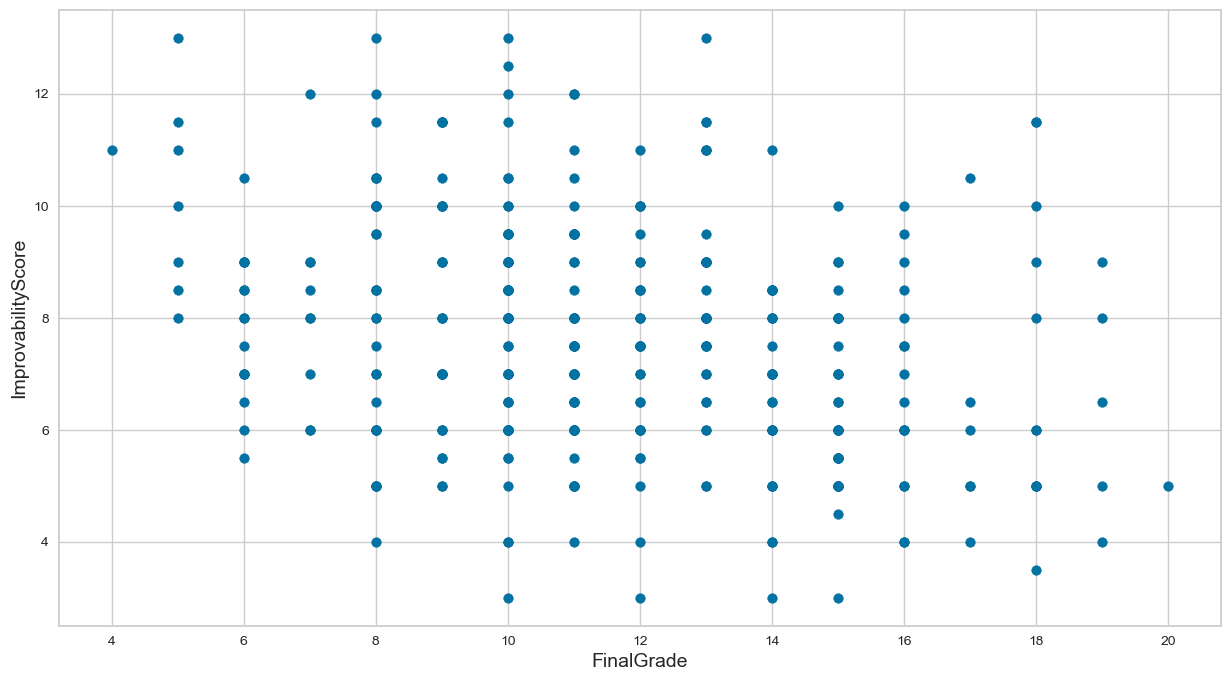

<IPython.core.display.Javascript object>

In [53]:
# Visualisation de ImprovabilityScore
# en fonction de FinalGrade
plt.figure(figsize=(15, 8))
plt.scatter(data=df1, x="FinalGrade", y="ImprovabilityScore")
plt.xlabel("FinalGrade", size=14)
plt.ylabel("ImprovabilityScore", size=14)
plt.show()

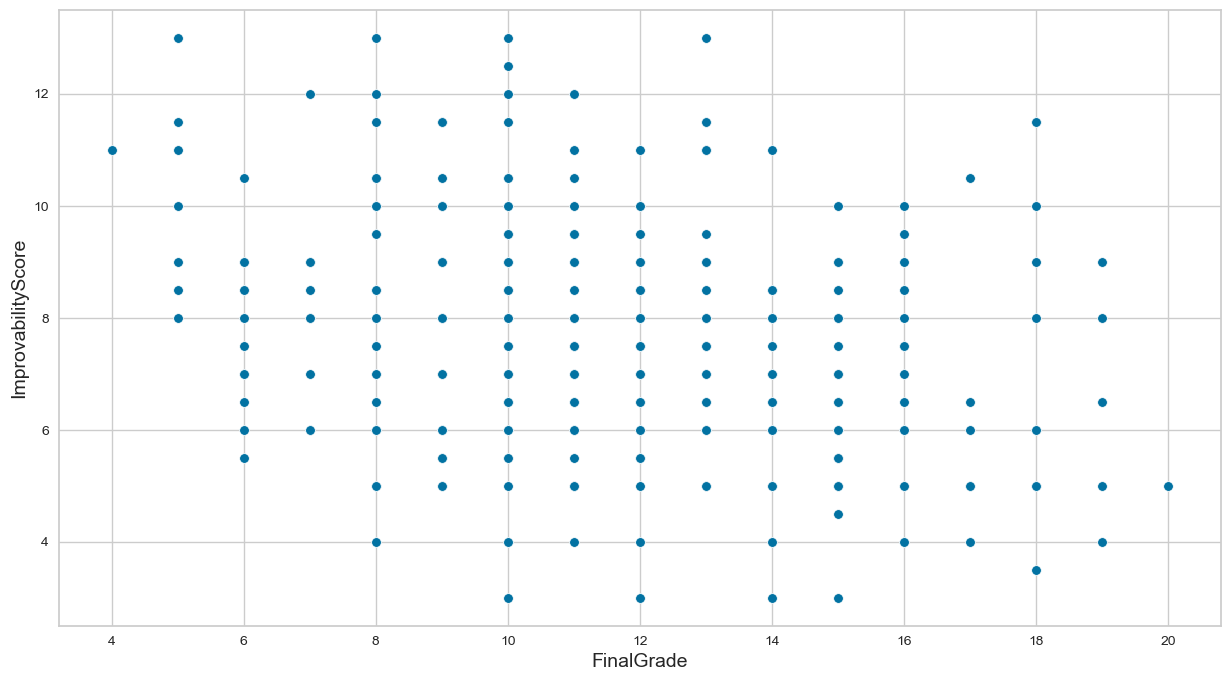

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x="FinalGrade",
    y="ImprovabilityScore",
    data=df1,
    # hue="paid",
    # palette="tab20",
)
plt.xlabel("FinalGrade", size=14)
plt.ylabel("ImprovabilityScore", size=14)
plt.show()

## 5. Esai d'ACP sur les variables d'origine
### 5.1. Normalisation des données

In [55]:
X = df1[action + target]
X.shape

(357, 5)

<IPython.core.display.Javascript object>

In [56]:
# Normalisation des données avec RobustScaler
# pour minimiser l'effet des outliers
robust_scal = RobustScaler().fit(X)
X_scaled = robust_scal.transform(X)
X_scaled.shape

(357, 5)

<IPython.core.display.Javascript object>

### 5.2. Entrainement des données

In [57]:
# Initialisation de la PCA
pca = PCA(random_state=0)
pca.fit(X_scaled)

# Affichage des pourcentages cumulés de variances expliquées
print(pca.explained_variance_ratio_.cumsum())

[0.45798983 0.72215231 0.86631857 0.95567934 1.        ]


<IPython.core.display.Javascript object>

3 composantes expliquent presque 87% de la variabilité des données.

4 composantes expliquent 95% de la variabilité des données.

### 5.3. Visualisation des composantes principales

In [58]:
def display_circles(
    pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None
):

    """Fonction pour afficher dans des cercles de corrélation et
     selon les axes d'inertie les variables du jeu de données

    - Arguments :
        - pcs : données projetées sur PCA
        - n_comp : nombre de composantes
        - axis_ranks : liste des axes par paire pour effectuer projection
        - labels : noms des variables du jeu de données

    - Affiche :
        - autant de graphes que de paires d'axes dans axis_ranks
            - projection sur composantes principales

    """

    # Pour chaque paire d'axes d'un plan factoriel
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8, 8))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = (
                    min(pcs[d1, :]),
                    max(pcs[d1, :]),
                    min(pcs[d2, :]),
                    max(pcs[d2, :]),
                )

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(
                    np.zeros(pcs.shape[1]),
                    np.zeros(pcs.shape[1]),
                    pcs[d1, :],
                    pcs[d2, :],
                    angles="xy",
                    scale_units="xy",
                    scale=1,
                    color="grey",
                )
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(
                    LineCollection(lines, axes=ax, alpha=0.1, color="black")
                )

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(
                            x,
                            y,
                            labels[i],
                            fontsize="14",
                            ha="center",
                            va="center",
                            rotation=label_rotation,
                            color="blue",
                            alpha=0.5,
                        )

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor="none", edgecolor="b")
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color="grey", ls="--")
            plt.plot([0, 0], [-1, 1], color="grey", ls="--")

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel(
                "F{} ({}%)".format(
                    d1 + 1, round(100 * pca.explained_variance_ratio_[d1], 1)
                )
            )
            plt.ylabel(
                "F{} ({}%)".format(
                    d2 + 1, round(100 * pca.explained_variance_ratio_[d2], 1)
                )
            )

            plt.title("Cercle des corrélations (F{} et F{})".format(d1 + 1, d2 + 1))
            plt.show(block=False)

<IPython.core.display.Javascript object>

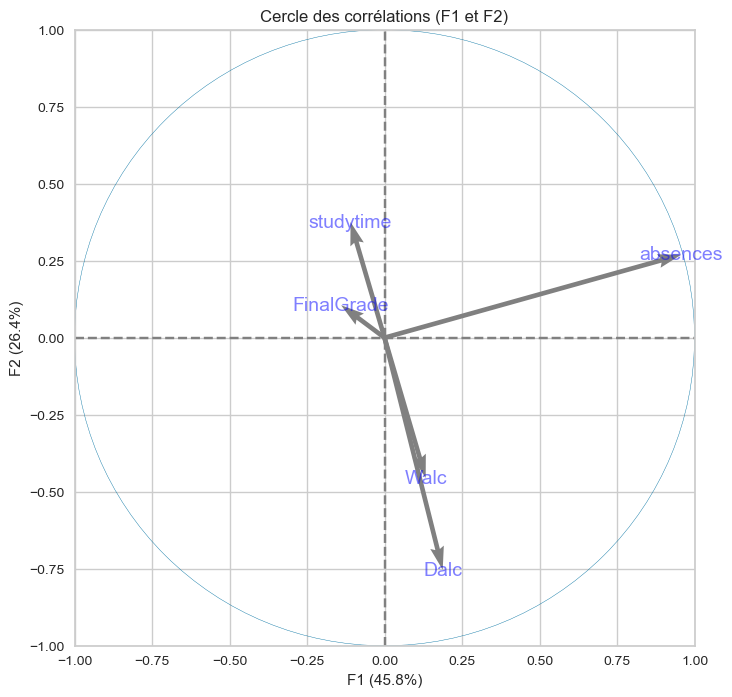

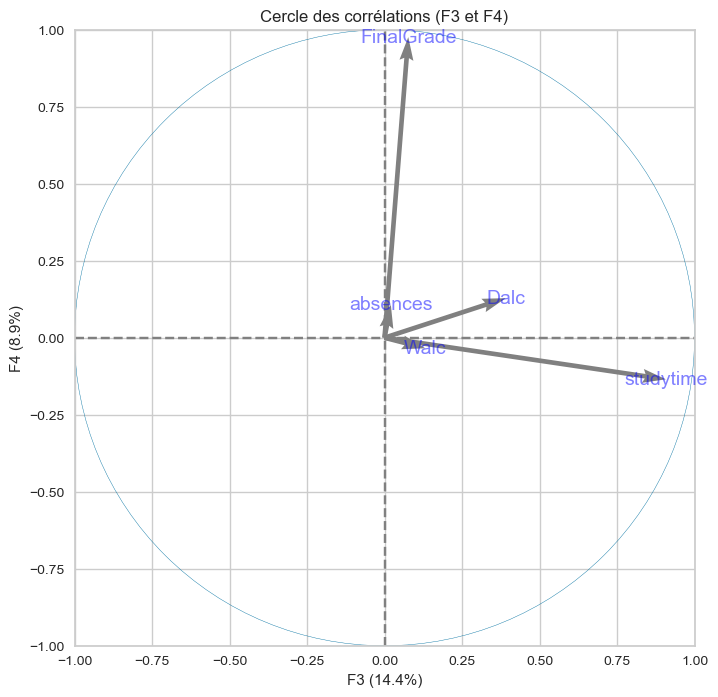

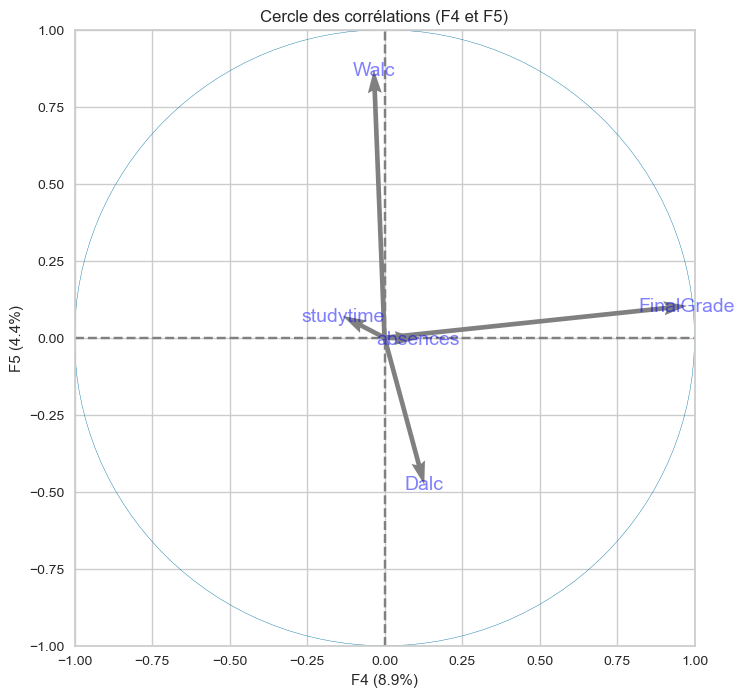

<IPython.core.display.Javascript object>

In [59]:
# Récupération des composantes de PCA
pcs = pca.components_

# Affichage des cercles de corrélation pour visualiser
# les composantes principales
display_circles(pcs, 5, pca, [(0, 1), (2, 3), (3, 4)], labels=X.columns)

La première composante est principalement influée par le nombre d'absences.

Avec la deuxième composante, on voit que le temps d'étude varie en sens contraire de la consommation d'alcool.

La troisième composante est principalement influée par le studytime.

La quatrième composante représente FinalGrade.

La cinquième composante est influée par la consommation d'alcool, majoriatirement de manière positive par la consommation d'alcool en semaine et minotairement de manière négative par la consommation d'alcool le week-end.

## 6. Clustering
### 6.1. Sur les variables d'origine
#### Premier aperçu
On va utiliser un dendrogramme pour avoir un premier apeçu de clustering.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0]],
 'dcoord': [[0.0, 7.378333967161662, 7.378333967161662, 0.0],
  [0.0, 13.275536293797169, 13.275536293797169, 0.0],
  [7.378333967161662,
   18.175491895251984,
   18.175491895251984,
   13.275536293797169],
  [0.0, 4.271394949523494, 4.271394949523494, 0.0],
  [0.0, 17.436362447948344, 17.436362447948344, 0.0],
  [4.271394949523494,
   18.779408263399162,
   18.779408263399162,
   17.436362447948344],
  [18.175491895251984,
   26.889627839217958,
   26.889627839217958,
   18.779408263399162]],
 'ivl': ['(12)', '(69)', '(117)', '(79)', '251', '(2)', '(16)', '(61)'],
 'leaves': [692, 702, 703, 707, 251, 565, 693, 706],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2']}

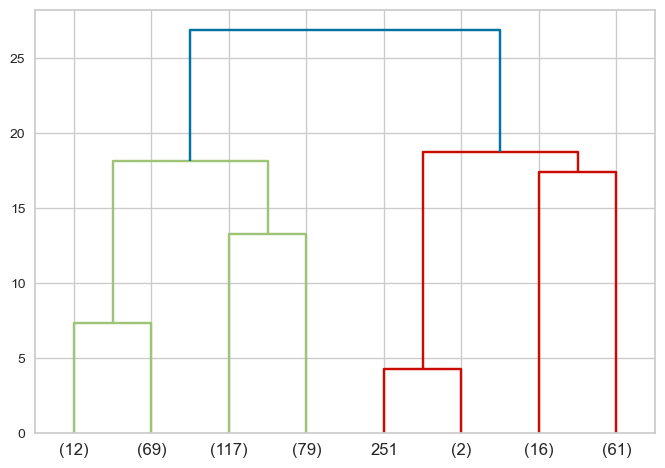

<IPython.core.display.Javascript object>

In [60]:
# Initialisation de la figure
plt.figure()

# Perform hierarchical/agglomerative clustering
dendrogram(
    linkage(X_scaled, method="ward"),
    truncate_mode="level",
    p=2,  # truncate mode
)
# No more than p levels of the dendrogram tree are displayed.
# A “level” includes all nodes with p merges from the final merge.

On s'attend à 5 ou 6 clusters.

#### KMeans
On va rechercher pour Kmeans le nombre optimal de clusters.

In [61]:
def result_Kmeans(n_min, n_max, X):

    """Fonction pour tester différentes valeurs de k pour le KMeans
    - pour chaque valeur de k
        - fit le modèle
        - récupère les clusters label
        - récupère les coordonnées des centroids
        - récupère les valeurs pour les scores
            - inertie
            - coefficient de silhouette
            - indice de davies_bouldin
            - calinski_harabasz_score

    - Arguments :
        - n_min : nombre minimal de clusters
        - n_max : nombre maximal de clusters
        - X : data à fitter

    - Retourne :
        - un dataframe avec les résultats
    """

    # Création du dataframe
    results = pd.DataFrame(
        columns=[
            "model",
            "n_clusters",
            "labels",
            "centroids",
            "inertia",
            "silhouette_score",
            "davies_bouldin_score",
            "calinski_harabasz_score",
        ]
    )

    # On boucle sur le nombre de clusters
    for num_clusters in range(n_min, n_max):

        # initialisation aléatoire et unique
        cls = KMeans(n_clusters=num_clusters, random_state=1)
        # n_init = 10 par défaut
        # init = ''k-means++' par défaut

        # on fit le modèle
        cls.fit(X)

        # prédiction des étiquettes
        labels = cls.labels_

        # Récupération des résultats
        result = {
            "model": str(cls).replace(", random_state=1", ""),
            "n_clusters": num_clusters,
            "labels": labels,
            "centroids": cls.cluster_centers_,
            "inertia": cls.inertia_,
            "silhouette_score": silhouette_score(X, labels),
            "davies_bouldin_score": davies_bouldin_score(X, labels),
            "calinski_harabasz_score": calinski_harabasz_score(X, labels),
        }

        # On compile dans le dataframe
        results = results.append(result, ignore_index=True)

    return results

<IPython.core.display.Javascript object>

In [66]:
def result_Kmeans(n_min, n_max, X):

    """Fonction pour tester différentes valeurs de k pour le KMeans
    - pour chaque valeur de k
        - fit le modèle
        - récupère les clusters label
        - récupère les coordonnées des centroids
        - récupère les valeurs pour les scores
            - inertie
            - coefficient de silhouette
            - indice de davies_bouldin
            - calinski_harabasz_score

    - Arguments :
        - n_min : nombre minimal de clusters
        - n_max : nombre maximal de clusters
        - X : data à fitter

    - Retourne :
        - un dataframe avec les résultats
    """

    # Création du dataframe
    results = pd.DataFrame()

    # On boucle sur le nombre de clusters
    for num_clusters in range(n_min, n_max):

        # initialisation aléatoire et unique
        cls = KMeans(n_clusters=num_clusters, random_state=1)
        # n_init = 10 par défaut
        # init = ''k-means++' par défaut

        # on fit le modèle
        cls.fit(X)

        # prédiction des étiquettes
        labels = cls.labels_

        # Récupération des résultats
        result = pd.DataFrame(
            [
                [
                    str(cls).replace(", random_state=1", ""),
                    num_clusters,
                    labels,
                    cls.cluster_centers_,
                    cls.inertia_,
                    silhouette_score(X, labels),
                    davies_bouldin_score(X, labels),
                    calinski_harabasz_score(X, labels),
                ]
            ],
            columns=[
                "model",
                "n_clusters",
                "labels",
                "centroids",
                "inertia",
                "silhouette_score",
                "davies_bouldin_score",
                "calinski_harabasz_score",
            ],
        )

        # On compile dans le dataframe
        results = pd.concat([results, result], axis=0, ignore_index=True)

    return results

<IPython.core.display.Javascript object>

In [67]:
def plot_results(model, df):

    """Fonction pour afficher les résultats d'un modèle
    - trace pour chaque valeur de n_clusters
        - inertie
        - coefficient de silhouette
        - indice de davies_bouldin
        - calinski_harabasz_score

    - Arguments :
        - model : nom du modèle
        - df : dataframe contenant les scores des coefficients ci-dessus

    - Affiche :
        - 4 graphes représentant chacun un score
    """

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(15, 10))
    plt.suptitle("Résultats {} ".format(model))

    # 1er graphe : valeur de l'inertie
    plt.subplot(411)
    plt.plot(df["n_clusters"], df["inertia"], marker="o")
    plt.ylabel("inertie", size=12)

    # 2ème graphe : silhouette_score
    plt.subplot(412)
    plt.plot(df["n_clusters"], df["silhouette_score"], marker="o")
    plt.ylabel("coefficient de silhouette", size=12)

    # 3ème graphe : davies_bouldin_score
    plt.subplot(413)
    plt.plot(df["n_clusters"], df["davies_bouldin_score"], marker="o")
    plt.ylabel("Indice de Davies Bouldin", size=12)

    # 4ème graphe : calinski_harabasz_score
    plt.subplot(414)
    plt.plot(df["model"], df["calinski_harabasz_score"], marker="o")
    plt.xlabel("modèle", size=12)
    plt.ylabel("calinski_harabasz_score", size=12)
    plt.xticks(rotation=45, ha="right")

    plt.show()

<IPython.core.display.Javascript object>

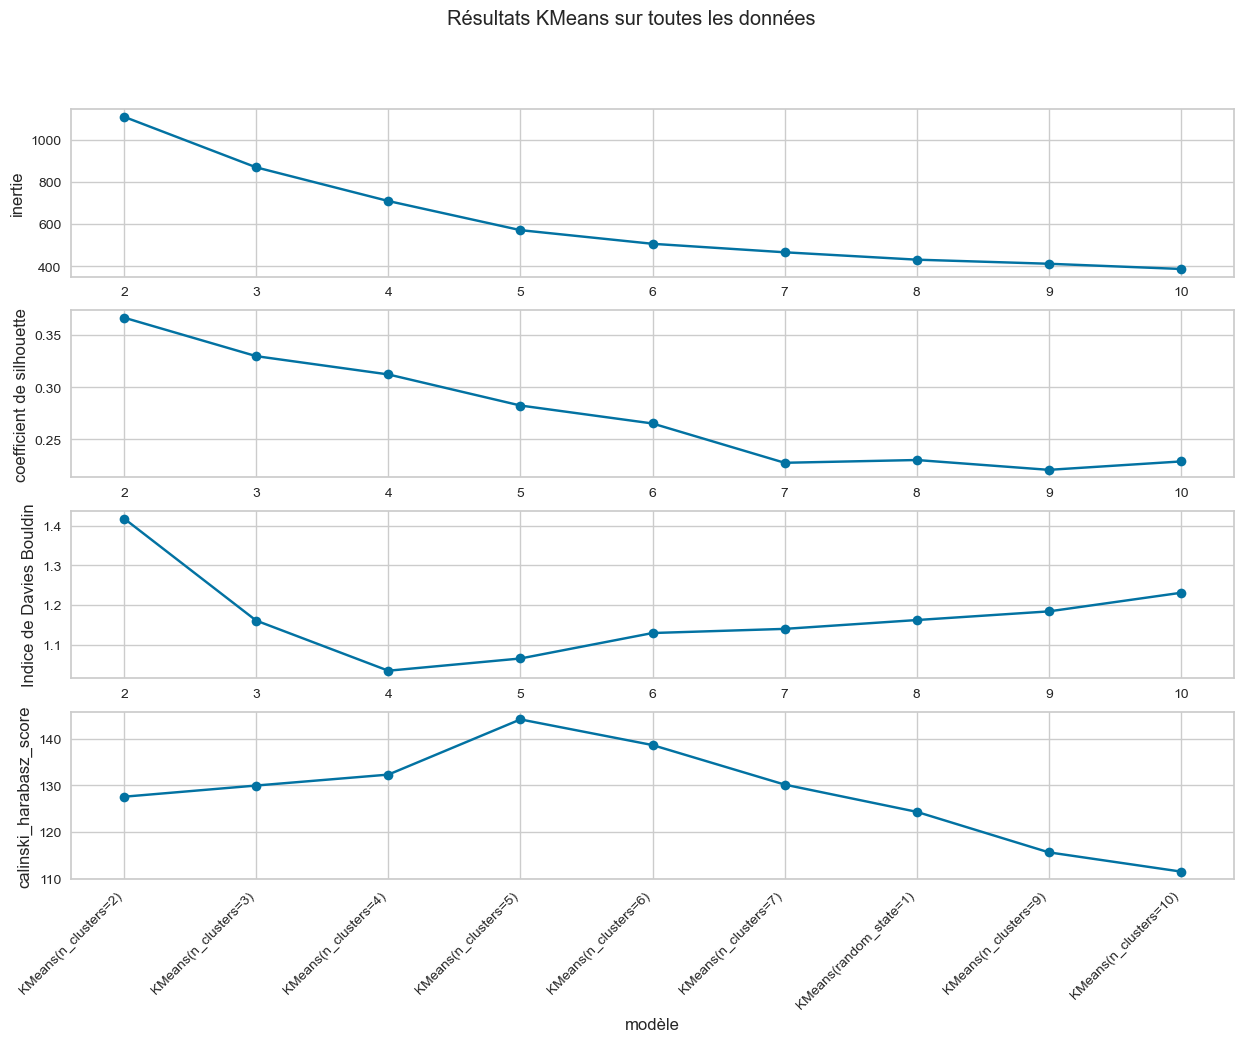

<IPython.core.display.Javascript object>

In [68]:
k_means = result_Kmeans(2, 11, X_scaled)
plot_results("KMeans sur toutes les données", k_means)

Pour choisir le nombre de clusters optimal, il faut :
- le silhouette_score le plus élevé
- le davies_bouldin_score le plus faible
- le calinski_harabasz_score le plus élevé
Pour n = 2 clusters, on a le le silhouette_score le plus élevé mais 2 clusters ont peu d'intérêt.
Pour n = 4, on a le davies_bouldin_score le plus faible.
Pour n = 5, on a le calinski_harabasz_score le plus élevé.
Notre choix va donc se porter sur 4 ou 5 clusters.

In [69]:
# Utilisation de la bibliothèque yellowbricks
liste_metric = ["distortion", "silhouette", "calinski_harabasz"]


def plot_elbow(n_min, n_max, X):

    """Fonction pour afficher la “elbow” method pour aider au
    choix du nombre de clusters, selon les metrics

    - Arguments :
       - n_min : nombre minimal de clusters
       - n_max : nombre maximal de clusters
       - X : data à fitter

    - Affiche :
        - 3 graphes représentant chacun un score en fonction du nombre
        de clusters
    """

    # Instantiate the clustering model
    model = KMeans(random_state=1)

    for met in liste_metric:

        # Instantiate visualizer
        visualizer = KElbowVisualizer(model, metric=met, k=(n_min, n_max))

        # Fit the data to the visualizer
        visualizer.fit(X)
        visualizer.poof()
        plt.show()

<IPython.core.display.Javascript object>

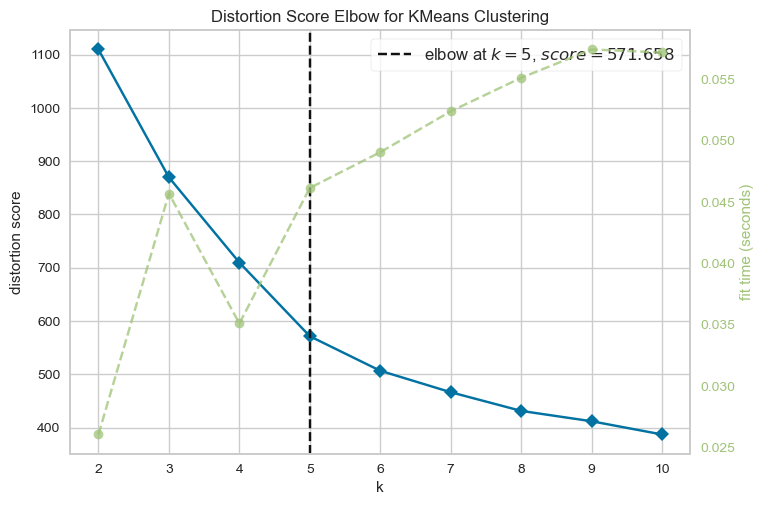

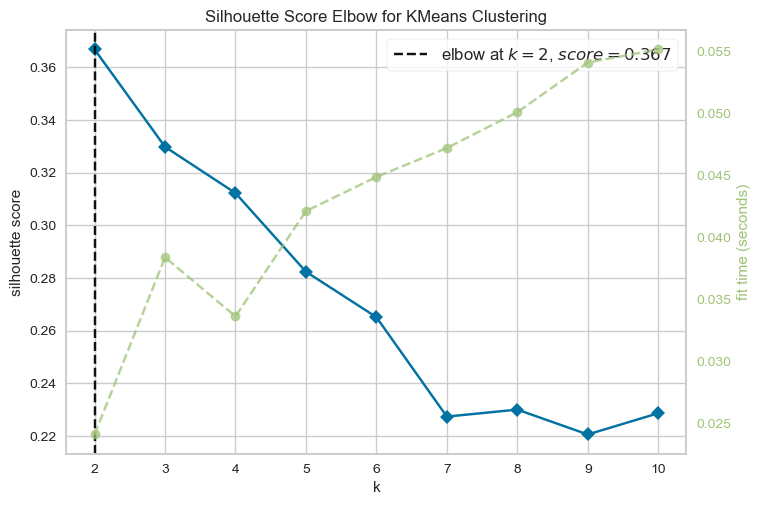

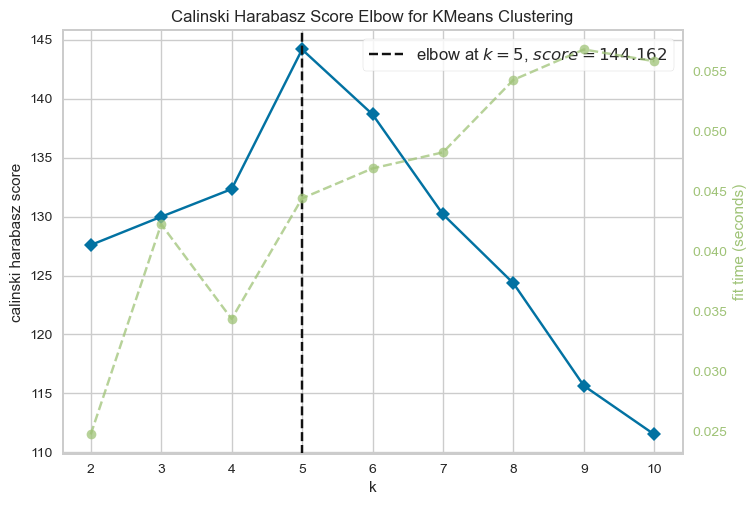

<IPython.core.display.Javascript object>

In [70]:
plot_elbow(2, 11, X_scaled)

Deux graphes orientent vers 5 clusters. On va donc partir sur 5 clusters.

In [71]:
def df_with_col_label(result, index, X):

    """Fonction pour ajouter la colonne label dans le dataset d'origine
    selon le modèle choisi

    - Arguments :
        - result : dataset regroupand les résultats d'un modèle
        - index : index dans le dataset result correspondant au meilleur modèle
        - X : dataframe d'origine à qui il faut ajouter la colonne label

    - Retourne :
        - un dataset avec données d'origine + colonne label
    """

    # Récupération du meilleur modèle
    best_model = result.iloc[index]

    # Récupération des labels du meilleur modèle
    labels = best_model["labels"]

    # Copie du dataset d'origine
    X1 = X.copy()

    # Ajout de la colonne label
    X1["label"] = labels

    return X1

<IPython.core.display.Javascript object>

In [72]:
def perc_cluster_repartition(X_with_col_label):

    """Fonction pour visualiser la répartition en pourcentage des individus
    selon les clusters (= labels)

    - Arguments :
        - X_with_col_label : dataframe d'origine avec la colonne label

    - Affiche :
        - un graphe représentant la distribution du nombre d'individus
        par cluster, en pourcentage

    - Retourne :
        - le nombre d'individus par cluster
    """

    # Visulisation sous forme de barplot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(
        x=X_with_col_label["label"].value_counts().index,
        y=X_with_col_label["label"].value_counts().values / len(X_with_col_label) * 100,
        palette="tab20",
    )
    plt.title("Distribution du nombre d'individus par cluster, en pourcentage", size=14)

    # ajout des étiquettes pour afficher valeurs de pourcentages
    for p in ax.patches:
        ax.annotate(
            format((p.get_height()), ".1f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
            fontsize=12,
        )
    plt.show()

    return X_with_col_label["label"].value_counts()

<IPython.core.display.Javascript object>

In [83]:
# Ajout de la valeur du label dans le dataframe d'origine
# dans le cas de 5 clusters
best_kmeans_5 = df_with_col_label(k_means, 3, X)

# Affichage du nombre de clients par label
best_kmeans_5["label"].value_counts()

1    173
4     78
3     57
0     44
2      5
Name: label, dtype: int64

<IPython.core.display.Javascript object>

In [78]:
best_kmeans_5["label"].value_counts().index

Int64Index([1, 4, 3, 0, 2], dtype='int64')

<IPython.core.display.Javascript object>

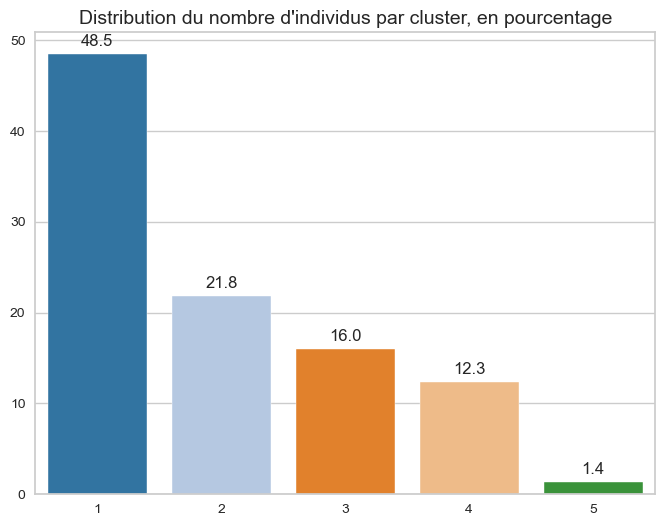

1    173
2     78
3     57
4     44
5      5
Name: label, dtype: int64

<IPython.core.display.Javascript object>

In [84]:
# Changement des labels pour que le plus gros cluster en nombre
# d'étudiants corresponde au label 0
# best_kmeans_5["label"].replace([1, 4, 3, 0, 2], [0, 1, 2, 3, 4], inplace=True)
best_kmeans_5["label"].replace(
    best_kmeans_5["label"].value_counts().index, [1, 2, 3, 4, 5], inplace=True
)
# Répartition des clusters
perc_cluster_repartition(best_kmeans_5)

Les clusters sont déséquilibrés.

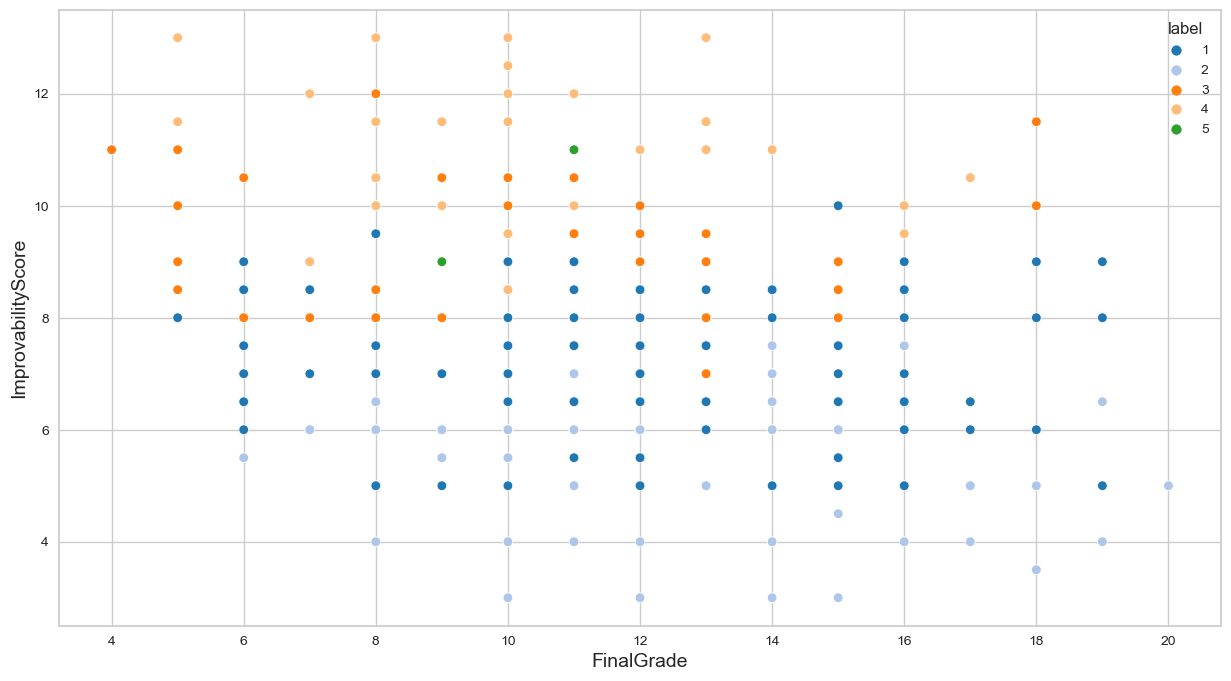

<IPython.core.display.Javascript object>

In [85]:
# Visualisation de ImprovabilityScore
# en fonction de FinalGrade
# selon les clusters
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x="FinalGrade",
    y="ImprovabilityScore",
    data=df1,
    hue=best_kmeans_5["label"],
    palette="tab20",
)
plt.xlabel("FinalGrade", size=14)
plt.ylabel("ImprovabilityScore", size=14)
plt.show()

#### Caractérisation des clusters

In [81]:
def plot_var_cluster(X_with_col_label):

    """Fonction pour visualiser la répartition des variables
    selon les clusters ( = labels)

    - Arguments :
        - X_with_col_label : dataframe d'origine avec la colonne label

    - Affiche :
        - 2 graphes pour chaque variable du dataframe X_with_col_label
            - barplot représentant la moyenne de la variable selon le cluster
            - boxplot de la variable selon le cluster
    """

    # On regroupe par label
    X_labeled = X_with_col_label.groupby("label").mean()

    for col in X_labeled.columns:

        # Initialisation de la figure
        f, axes = plt.subplots(1, 2, figsize=(15, 4))

        # boxplot de la variable selon le cluster
        sns.boxplot(
            y="label",
            x=col,
            data=X_with_col_label,
            orient="h",
            ax=axes[0],
            palette="tab20",
        )

        # barplot de la valeur moyenne de la variable selon le cluster
        sns.barplot(
            y=X_labeled.index,
            x=col,
            data=X_labeled,
            orient="h",
            ax=axes[1],
            palette="tab20",
        )

        plt.title("Moyenne de {} pour chaque cluster".format(col), size=14)
        plt.show()

<IPython.core.display.Javascript object>

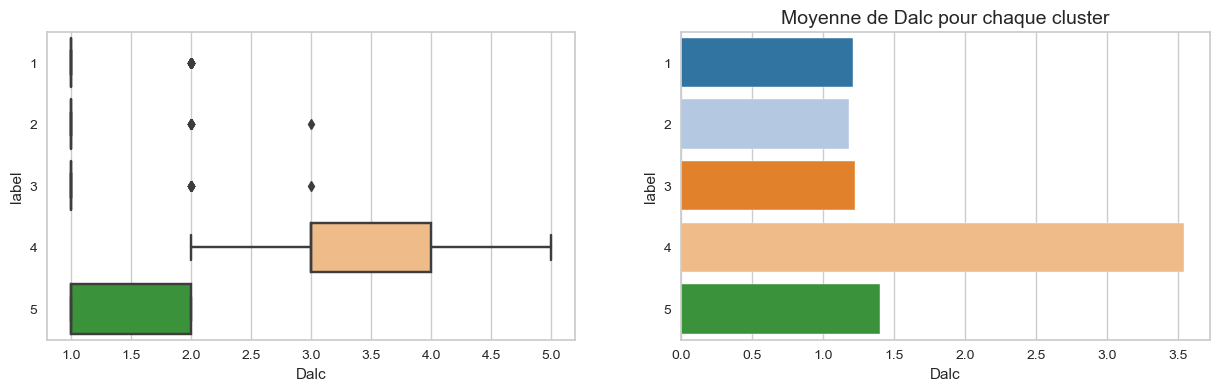

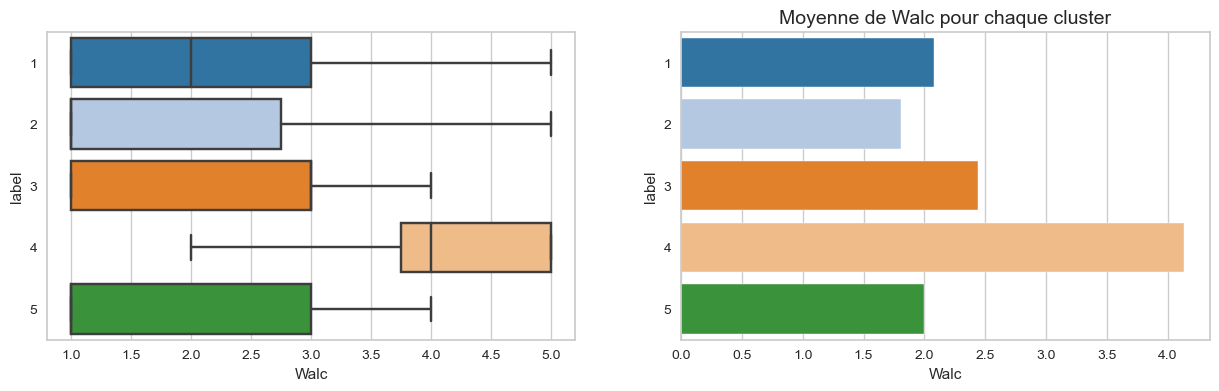

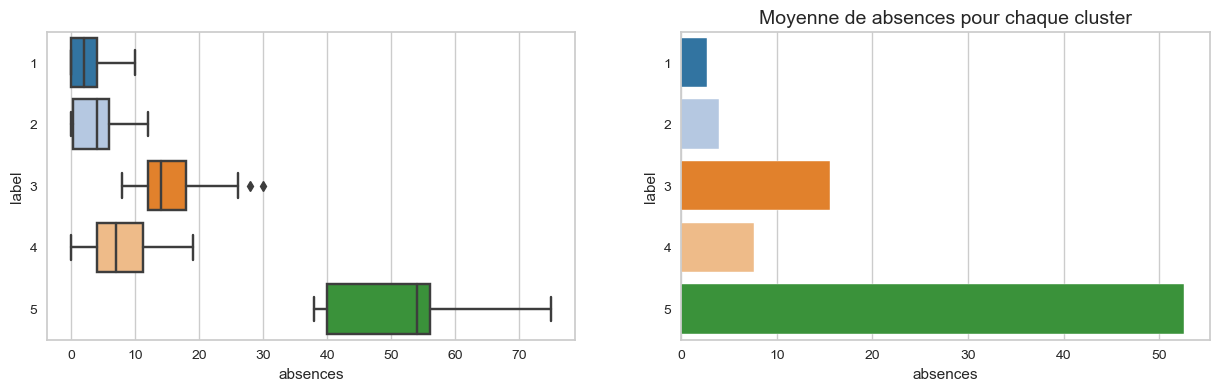

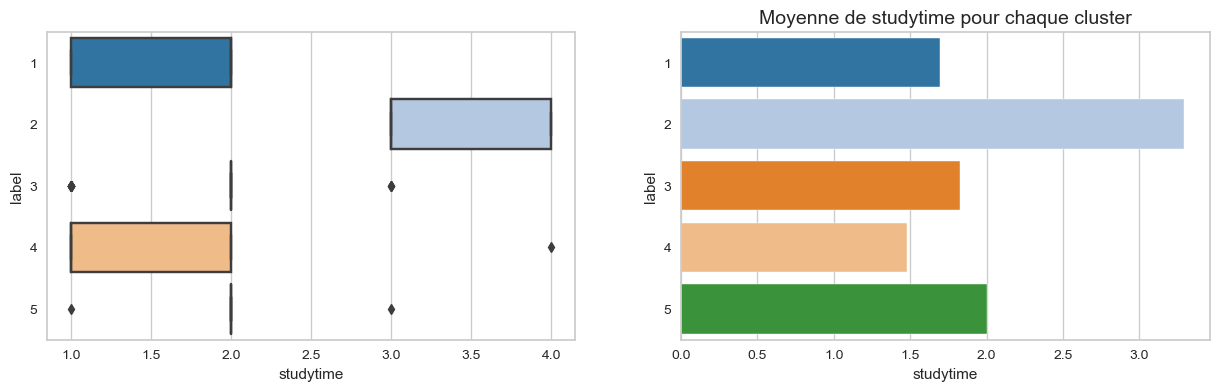

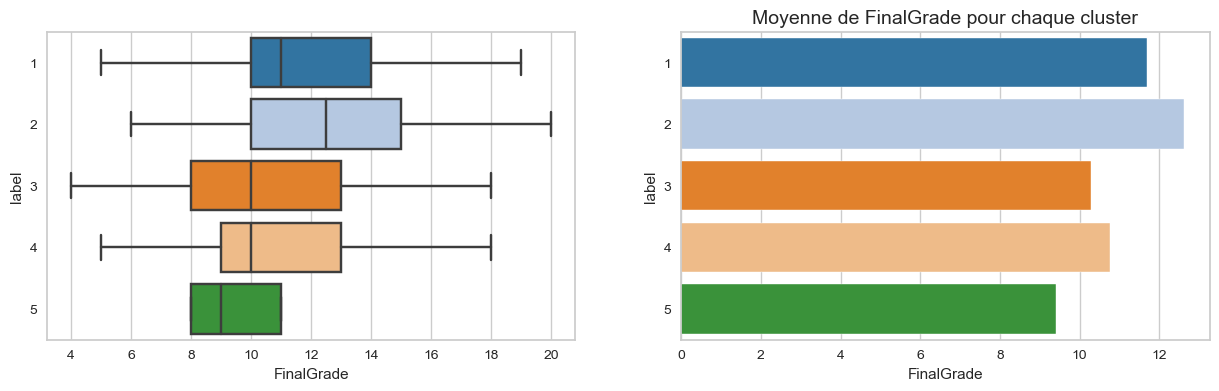

<IPython.core.display.Javascript object>

In [86]:
plot_var_cluster(best_kmeans_5)

- Le cluster 1 correspond à ceux qui ont un nombre moyen d'absences le plus faible sont moyens dans le reste.
- Le cluster 2 correspond à ceux qui étudient le plus.
- Le cluster 3 correspond à ceux qui ont un temps d'étude dans la moyenne mais un nombre d'absences supérieur à la moyenne.
- Le cluster 4 correspond à ceux qui ont une consommation élevée d'alcool en semaine et le week-end.
- Le cluster 5 corespond à ceux qui ont le nombre d'absences le plus élevé et un FinalGrade en moyenne plus faible.

La caractérisation des clusters n'est pas si évidente.

### 6.2. Clustering avec les nouvelles variables
On va effectuer le clustering en utisant les variables FinalGrade, score_abs, alc et score_study.

#### Normalisation des variables
Comme ces variables ne prennent pas de valeurs extremes, on va utiliser un StandarScaler pour les normaliser.

In [87]:
X1 = df1[["score_study", "score_abs", "alc"] + target]
X1.shape

(357, 4)

<IPython.core.display.Javascript object>

In [88]:
# Normalisation des données avec StandardScaler
st_scal = StandardScaler().fit(X1)
X_st = st_scal.transform(X1)
X_st.shape

(357, 4)

<IPython.core.display.Javascript object>

#### Premier aperçu de clustering

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0]],
 'dcoord': [[0.0, 4.433488296237755, 4.433488296237755, 0.0],
  [0.0, 8.209822261515932, 8.209822261515932, 0.0],
  [4.433488296237755,
   12.411585863871412,
   12.411585863871412,
   8.209822261515932],
  [0.0, 11.136572719458007, 11.136572719458007, 0.0],
  [0.0, 14.595953836999605, 14.595953836999605, 0.0],
  [11.136572719458007,
   20.040057535866058,
   20.040057535866058,
   14.595953836999605],
  [12.411585863871412,
   24.94643962902967,
   24.94643962902967,
   20.040057535866058]],
 'ivl': ['(7)', '(11)', '(16)', '(72)', '(41)', '(43)', '(45)', '(122)'],
 'leaves': [667, 676, 683, 701, 702, 703, 705, 707],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C3', 'C0', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C1', 'C2', 'C2', 'C3', 'C3']}

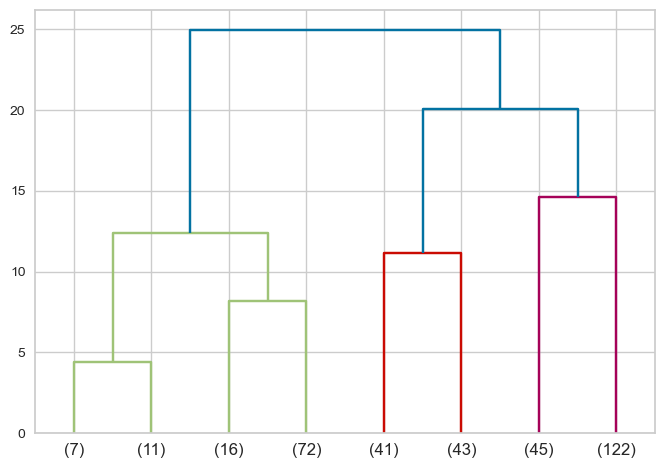

<IPython.core.display.Javascript object>

In [89]:
# Initialisation de la figure
plt.figure()

# Perform hierarchical/agglomerative clustering
dendrogram(
    linkage(X_st, method="ward"),
    truncate_mode="level",
    p=2,  # truncate mode
)
# No more than p levels of the dendrogram tree are displayed.
# A “level” includes all nodes with p merges from the final merge

Entre 3 et 6 clustering a priori.
#### KMeans

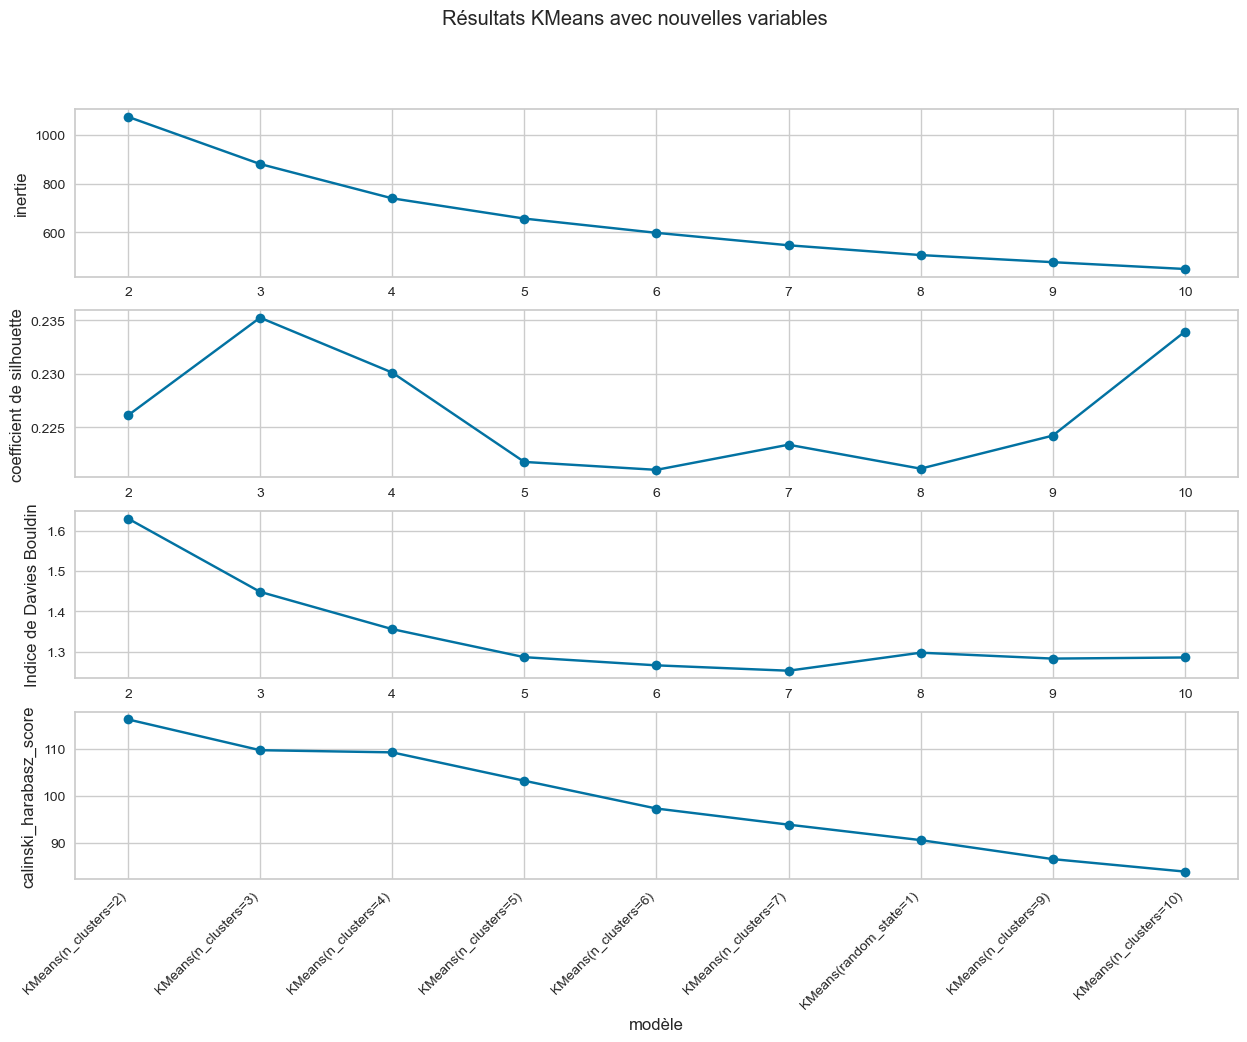

<IPython.core.display.Javascript object>

In [90]:
k_means1 = result_Kmeans(2, 11, X_st)
plot_results("KMeans avec nouvelles variables", k_means1)

Les scores n'orientent pas vers le même nombre de clusters : 3, 4, 5 ou 6.

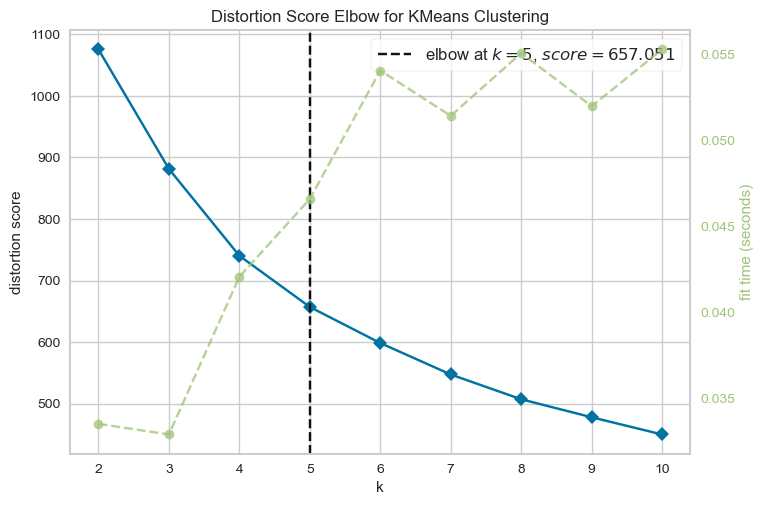

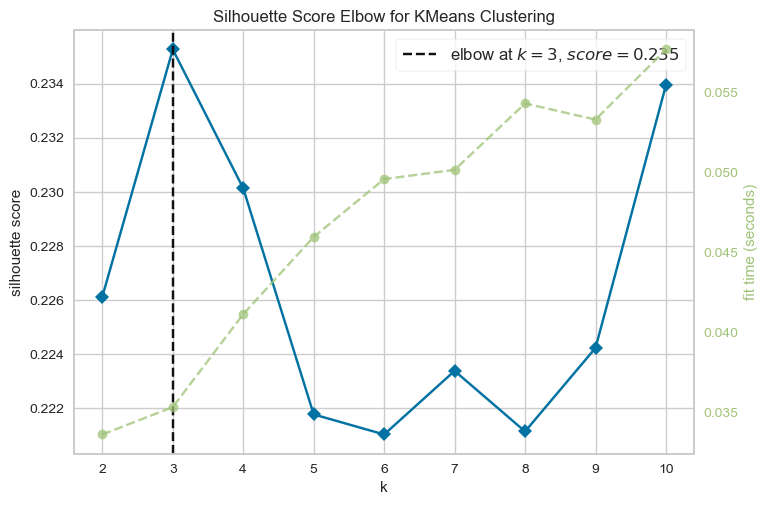

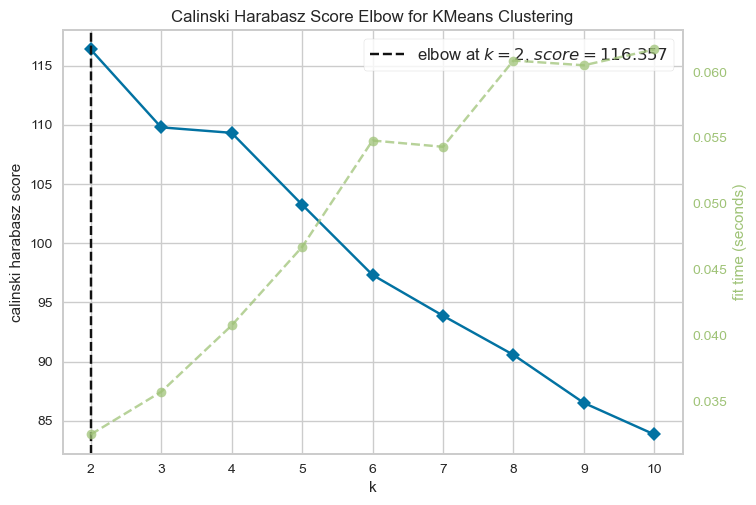

<IPython.core.display.Javascript object>

In [91]:
plot_elbow(2, 11, X_st)

Pas forcément plus concluant, on va regarder avec 5 clusters.
##### 5 clusters

In [92]:
# Ajout de la valeur du label dans le dataframe d'origine
# dans le cas de 5 clusters
best_kmeans_5_1 = df_with_col_label(k_means1, 3, X1)

# Affichage du nombre de clients par label
best_kmeans_5_1["label"].value_counts()

1    99
0    76
2    70
4    57
3    55
Name: label, dtype: int64

<IPython.core.display.Javascript object>

Les clusters sont plus équilibrés.

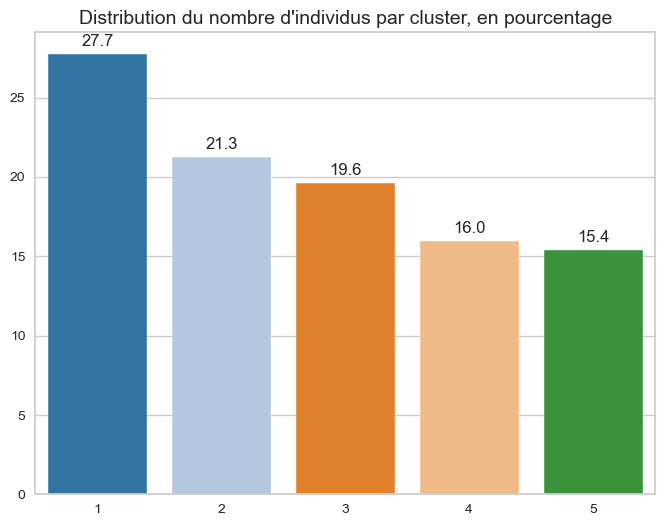

1    99
2    76
3    70
4    57
5    55
Name: label, dtype: int64

<IPython.core.display.Javascript object>

In [93]:
# Changement des labels pour que le plus gros cluster en nombre
# d'étudiants corresponde au label 1
best_kmeans_5_1["label"].replace(
    best_kmeans_5_1["label"].value_counts().index, [1, 2, 3, 4, 5], inplace=True
)

# Répartition des clusters
perc_cluster_repartition(best_kmeans_5_1)

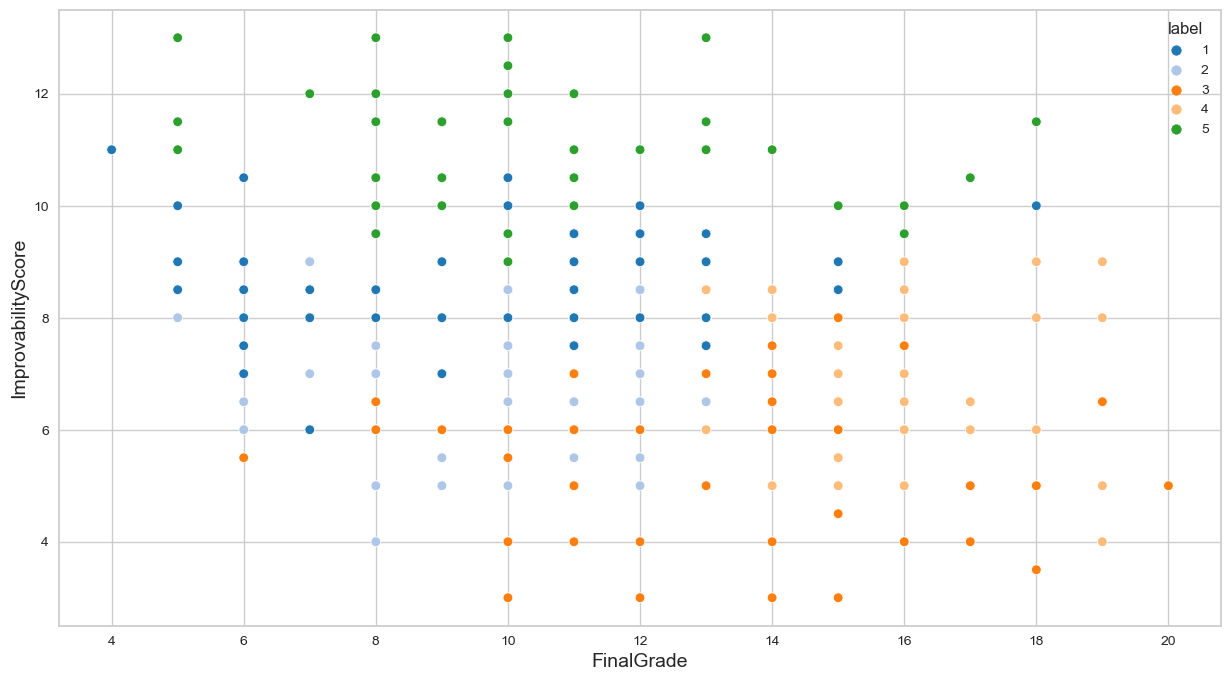

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(15, 8))
sns.scatterplot(
    x="FinalGrade",
    y="ImprovabilityScore",
    data=df1,
    hue=best_kmeans_5_1["label"],
    palette="tab20",
)
plt.xlabel("FinalGrade", size=14)
plt.ylabel("ImprovabilityScore", size=14)
plt.show()

##### Caractéristiques des clusters

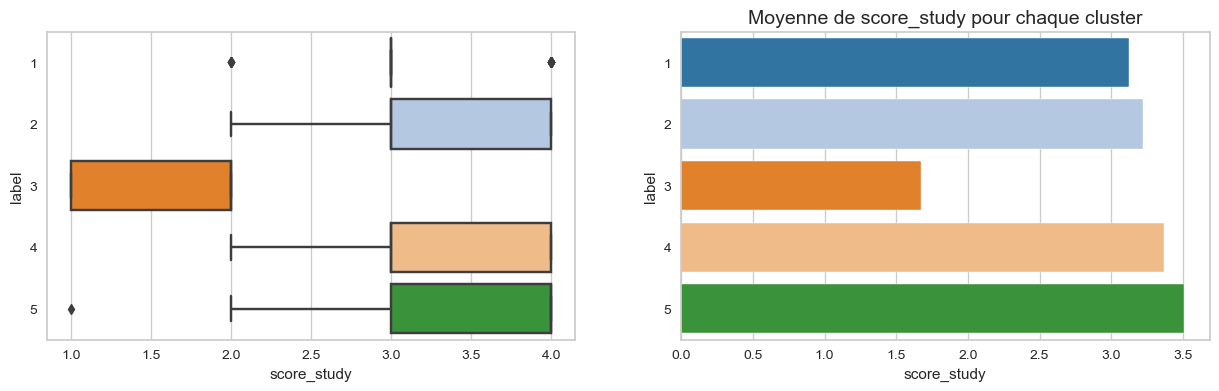

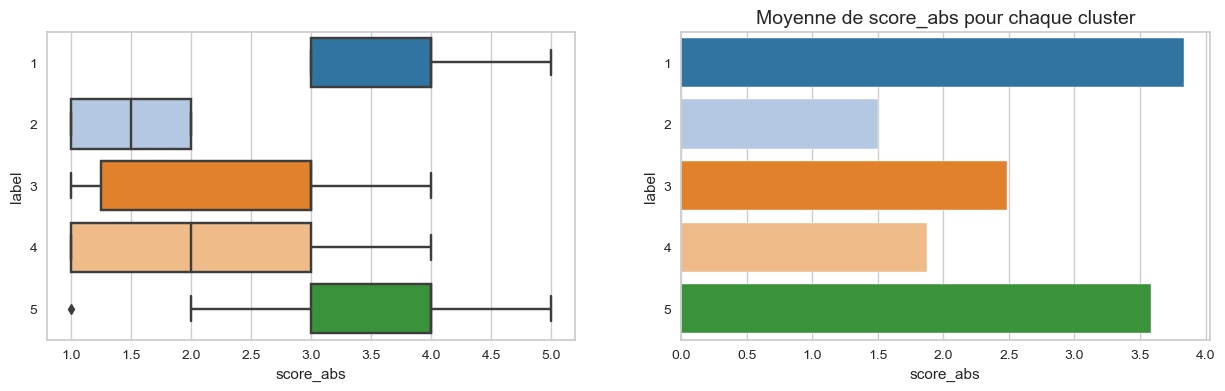

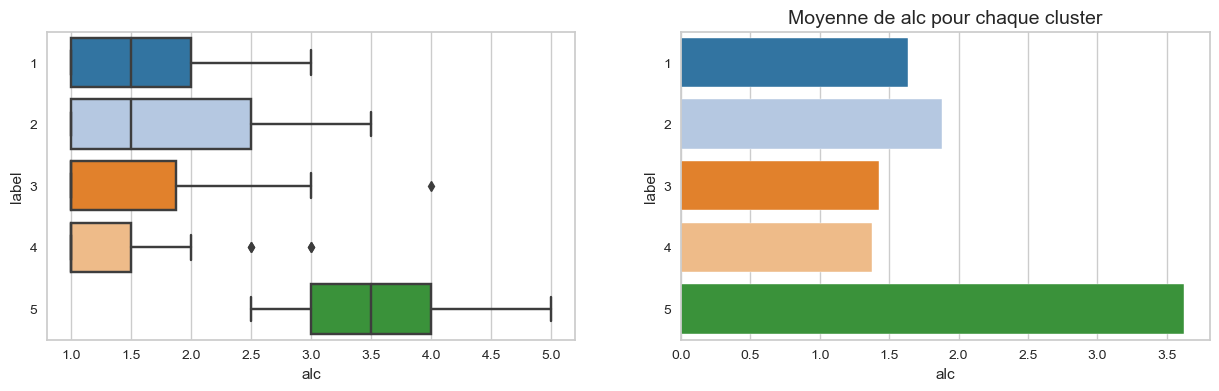

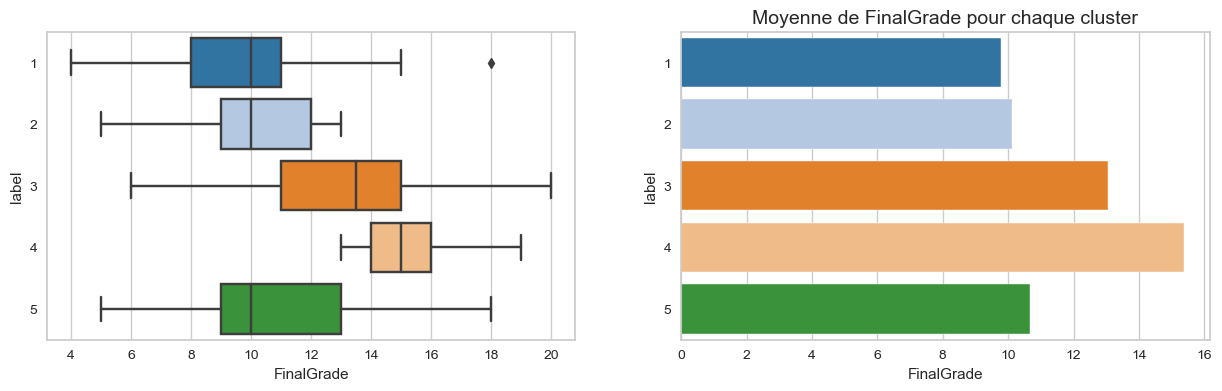

<IPython.core.display.Javascript object>

In [95]:
plot_var_cluster(best_kmeans_5_1)

- Le cluster 1 correspond à ceux qui ont un Finalgrade le plus faible et un score d'absence élevé.
- Le cluster 2 correspond à ceux qui sont les moins absents avec des notes mauvaises à moyennes.
- Le cluster 3 correspond à ceux qui ont un temps d'étude le plus élevé et un Finalgrade assez étalé, bien qu'en moyenne supérieur à 12.
- Le cluster 4 correspond à ceux qui ont les meilleurs FinalGrade et une consommation d'alcool la plus faible.
- Le cluster 5 corespond à ceux qui ont score d'absence élevé et unse consommation d'alcool élevée.

## Conclusion et perspectives
Nous avons défini un score pour qualifier l'aide que l'on peut apporter aux étudiants, ImprovabilityScore, par combinaisons de différentes variables que nous avons créées à partir d'indicateurs actionnables comme "Dalc" (consommation d'lacool en semaine), "Walc" (consommation d'lacool le week-end), "absences", "studytime" (temps d'étude).

Nous avons pu mettre en place un premier clustering pour identifier les étudiants à partir des indicateurs actionnables.

En perspectives, nous pourrions également intégrer d'autres variables.